In [ ]:
import rpy2.robjects as robjects
import numpy as np
import os as os
from rpy2.robjects import numpy2ri
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


In [171]:
%load_ext autoreload
%autoreload 2
# Specify the path to your data files
data_path = "/Users/sarahurbut/Dropbox (Personal)/mgbbtopic/"

# Activate automatic conversion between R and NumPy arrays
numpy2ri.activate()# Load data saved as .rds files
Y = np.array(robjects.r['readRDS'](os.path.join(data_path, 'Y_sub.rds')))
E = np.array(robjects.r['readRDS'](os.path.join(data_path, 'E_sub.rds')))
E = E.astype(int)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
E.shape

(34592, 346)

In [ ]:

# Convert to PyTorch tensors
Y_tensor = torch.FloatTensor(Y)
E_tensor = torch.FloatTensor(E)


In [188]:
# Get dimensions
N, D, T = Y_tensor.shape
T = int(E_tensor.max() + 1)  # 0-indexed time
K = 20  # number of topics


In [189]:
import pandas as pd
from rpy2.robjects import pandas2ri
pandas2ri.activate()
# Load the metadata from R
disease_names = pd.DataFrame(robjects.r['readRDS']('/Users/sarahurbut/Dropbox (Personal)/mgbbtopic/diagnames.rds'))
disease_names = disease_names[0].tolist()

In [190]:
# Print shapes to verify
print("Tensor shapes:")
print(f"Y: {Y_tensor.shape}")  # [N, D]
print(f"E: {E_tensor.shape}")  # [N, D]
print(f"Time range: 0 to {T-1}")
print(T)
print(K)


Tensor shapes:
Y: torch.Size([34592, 346, 51])
E: torch.Size([34592, 346])
Time range: 0 to 50
51
20


In [191]:

# G should be float64
G = np.array(robjects.r['readRDS'](os.path.join(data_path, 'G_sub.rds')))
G = G.astype(float)
G.shape
G = G.T
print("G shape after transposition:", G.shape)
G_tensor = torch.FloatTensor(G)
print(f"G: {G_tensor.shape}")  # [N, P]

G shape after transposition: (34592, 36)
G: torch.Size([34592, 36])


In [192]:
import numpy as np
import pandas as pd
import torch
import argparse
import os
import sys

sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/')

from cluster_g_logit_init_acceptpsi import *
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

In [193]:
Y = torch.tensor(Y, dtype=torch.float32)
prevalence_t=compute_smoothed_prevalence(Y=Y,window_size=5)


In [194]:
psi_config = {'in_cluster': 1, 'out_cluster': -2, 'noise_in': 0.1, 'noise_out': 0.01}



# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False




model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
N=Y.shape[0],
D=Y.shape[1],
T=Y.shape[2],
K=K,
P=G.shape[1],
G=G,
Y=Y,
prevalence_t=prevalence_t
)

model.initialize_params(psi_config=psi_config)
psi1 = model.psi.detach().clone()


/Users/sarahurbut/aladynoulli2/pyScripts/cluster_g_logit_init_acceptpsi.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 45200668.00
Phi kernel condition number: 89734320.00

Cluster Sizes:
Cluster 0: 6 diseases
Cluster 1: 28 diseases
Cluster 2: 24 diseases
Cluster 3: 11 diseases
Cluster 4: 24 diseases
Cluster 5: 20 diseases
Cluster 6: 15 diseases
Cluster 7: 16 diseases
Cluster 8: 19 diseases
Cluster 9: 13 diseases
Cluster 10: 7 diseases
Cluster 11: 7 diseases
Cluster 12: 68 diseases
Cluster 13: 7 diseases
Cluster 14: 13 diseases
Cluster 15: 12 diseases
Cluster 16: 16 diseases
Cluster 17: 8 diseases
Cluster 18: 12 diseases
Cluster 19: 20 diseases
Initialization complete!

Using psi configuration
Initialization complete!


In [195]:
psi_config = {'in_cluster': 1, 'out_cluster': -2, 'noise_in': 0.1, 'noise_out': 0.01}

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


model2 = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
N=Y.shape[0],
D=Y.shape[1],
T=Y.shape[2],
K=K,
P=G.shape[1],
G=G,
Y=Y,
prevalence_t=prevalence_t
)

model2.initialize_params(psi_config=psi_config)
psi2 = model2.psi.detach().clone()



print("Psi values match:", torch.allclose(psi1, psi2))

Lambda kernel condition number: 45200668.00
Phi kernel condition number: 89734320.00


/Users/sarahurbut/aladynoulli2/pyScripts/cluster_g_logit_init_acceptpsi.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)



Cluster Sizes:
Cluster 0: 6 diseases
Cluster 1: 28 diseases
Cluster 2: 24 diseases
Cluster 3: 11 diseases
Cluster 4: 24 diseases
Cluster 5: 20 diseases
Cluster 6: 15 diseases
Cluster 7: 16 diseases
Cluster 8: 19 diseases
Cluster 9: 13 diseases
Cluster 10: 7 diseases
Cluster 11: 7 diseases
Cluster 12: 68 diseases
Cluster 13: 7 diseases
Cluster 14: 13 diseases
Cluster 15: 12 diseases
Cluster 16: 16 diseases
Cluster 17: 8 diseases
Cluster 18: 12 diseases
Cluster 19: 20 diseases
Initialization complete!

Using psi configuration
Initialization complete!
Psi values match: True


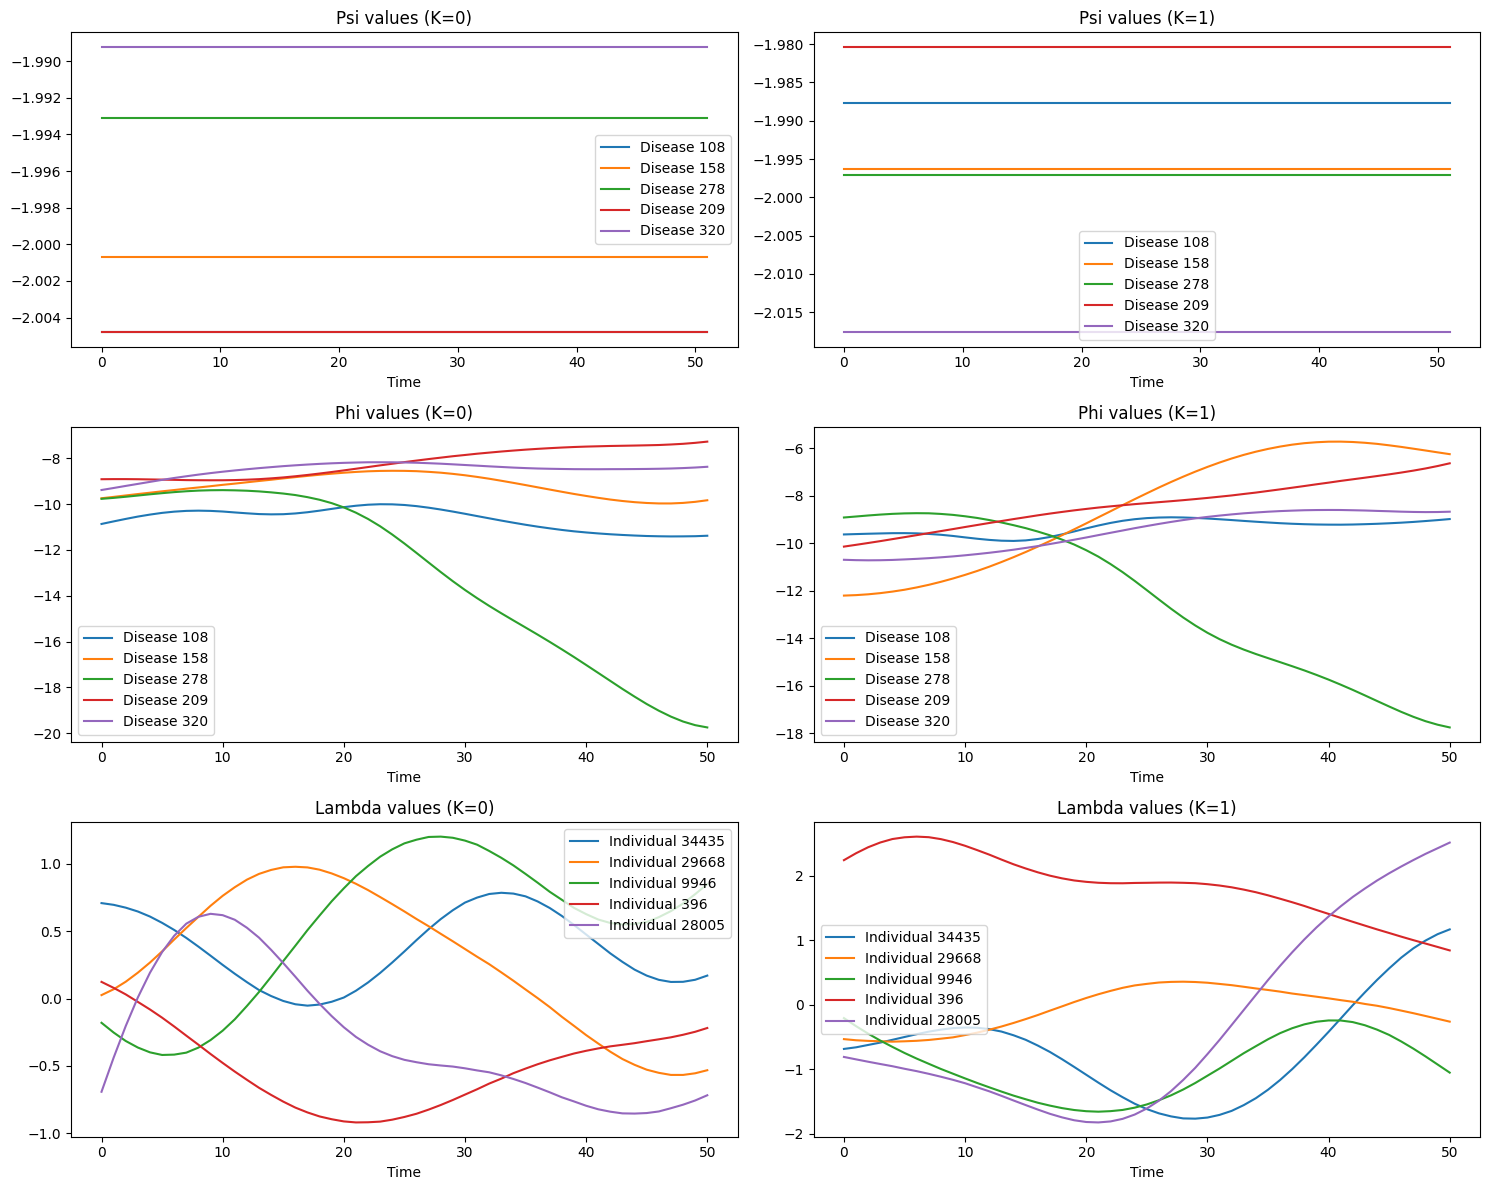


Cluster membership for sampled diseases:
Disease 108: Cluster 5
Disease 158: Cluster 14
Disease 278: Cluster 19
Disease 209: Cluster 8
Disease 320: Cluster 2


/Users/sarahurbut/aladynoulli2/pyScripts/cluster_g_logit_init_acceptpsi.py:719: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


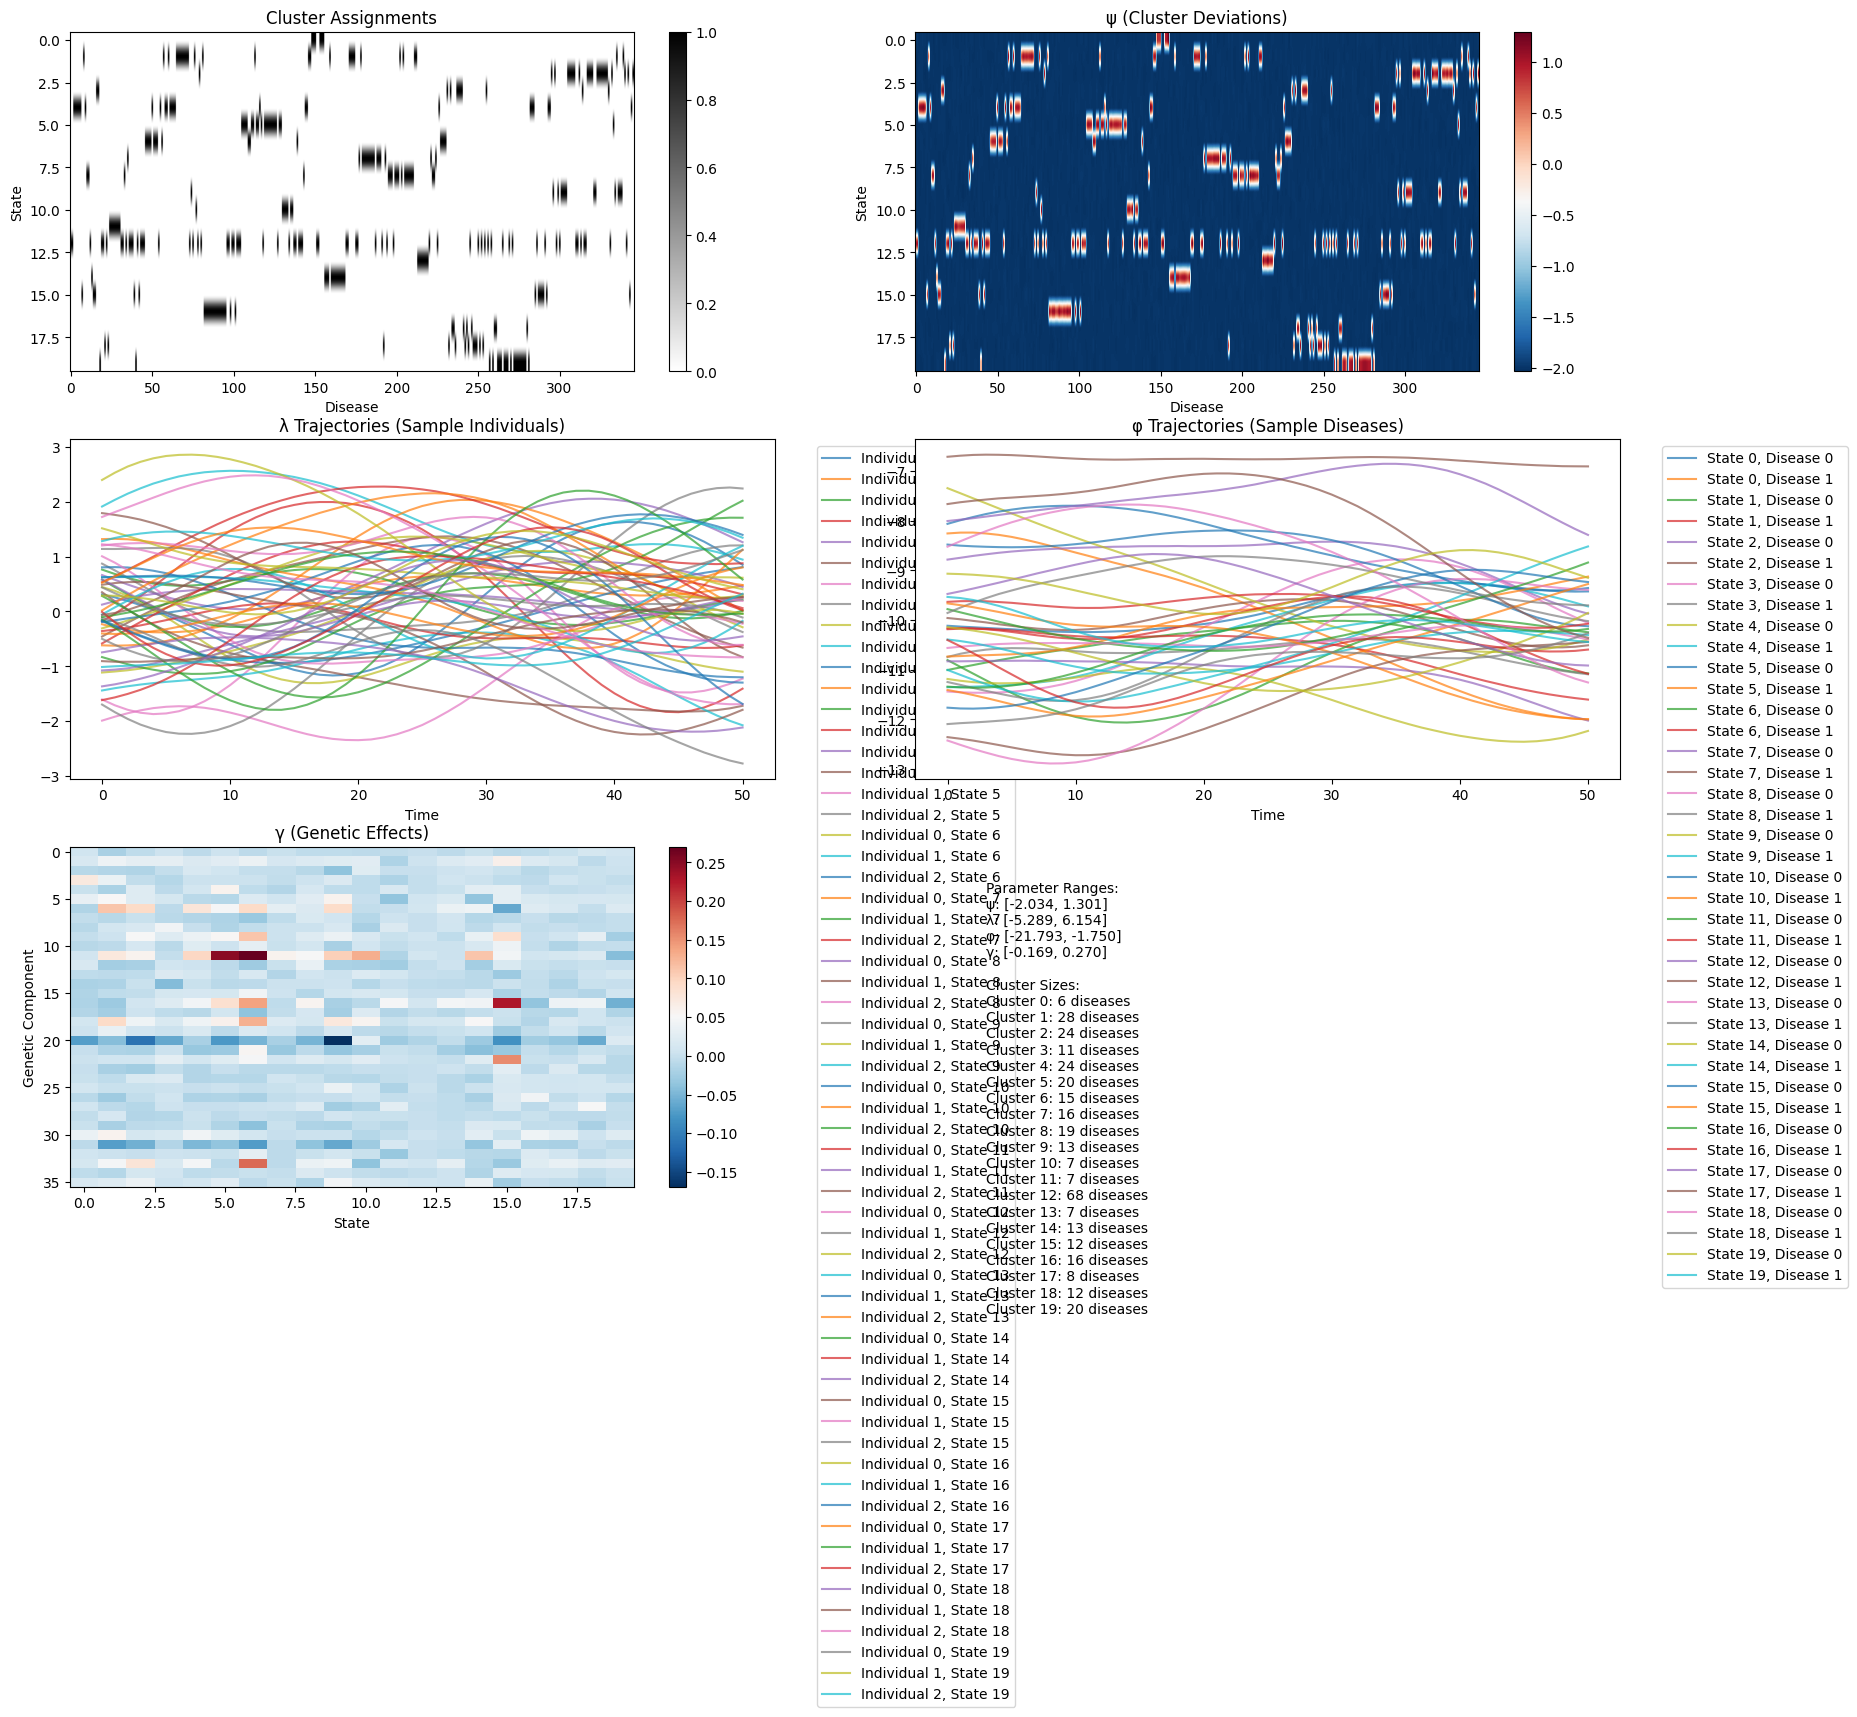

In [196]:

model.plot_initial_params()
model.visualize_initialization()

In [31]:
# Save both psi and clusters from the 400K initialization
torch.save(model.psi.detach(), 'initial_psi_mgb.pt')
torch.save(model.clusters, 'initial_clusters_mgb.pt')
# Load saved clusters
initial_clusters = torch.load('initial_clusters_mgb.pt')


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_72846/401845309.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_clusters = torch.load('initial_cluster

In [197]:
initial_psi=torch.load('initial_psi_mgb.pt')
initial_clusters=torch.load('initial_clusters_mgb.pt')

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_72846/824123103.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi=torch.load('initial_psi_mgb.pt')
/


Empirical signature proportions:
Signature 0 (6 diseases):
  t=0:  0.034
  t=51: 0.015
Signature 1 (28 diseases):
  t=0:  0.267
  t=51: 0.106
Signature 2 (24 diseases):
  t=0:  0.108
  t=51: 0.114
Signature 3 (11 diseases):
  t=0:  0.023
  t=51: 0.031
Signature 4 (24 diseases):
  t=0:  0.076
  t=51: 0.082
Signature 5 (20 diseases):
  t=0:  0.027
  t=51: 0.094
Signature 6 (15 diseases):
  t=0:  0.042
  t=51: 0.102
Signature 7 (16 diseases):
  t=0:  0.024
  t=51: 0.027
Signature 8 (19 diseases):
  t=0:  0.054
  t=51: 0.050
Signature 9 (13 diseases):
  t=0:  0.049
  t=51: 0.061
Signature 10 (7 diseases):
  t=0:  0.005
  t=51: 0.024
Signature 11 (7 diseases):
  t=0:  0.004
  t=51: 0.009
Signature 12 (68 diseases):
  t=0:  0.070
  t=51: 0.065
Signature 13 (7 diseases):
  t=0:  0.009
  t=51: 0.006
Signature 14 (13 diseases):
  t=0:  0.023
  t=51: 0.048
Signature 15 (12 diseases):
  t=0:  0.065
  t=51: 0.074
Signature 16 (16 diseases):
  t=0:  0.026
  t=51: 0.041
Signature 17 (8 diseases):
 

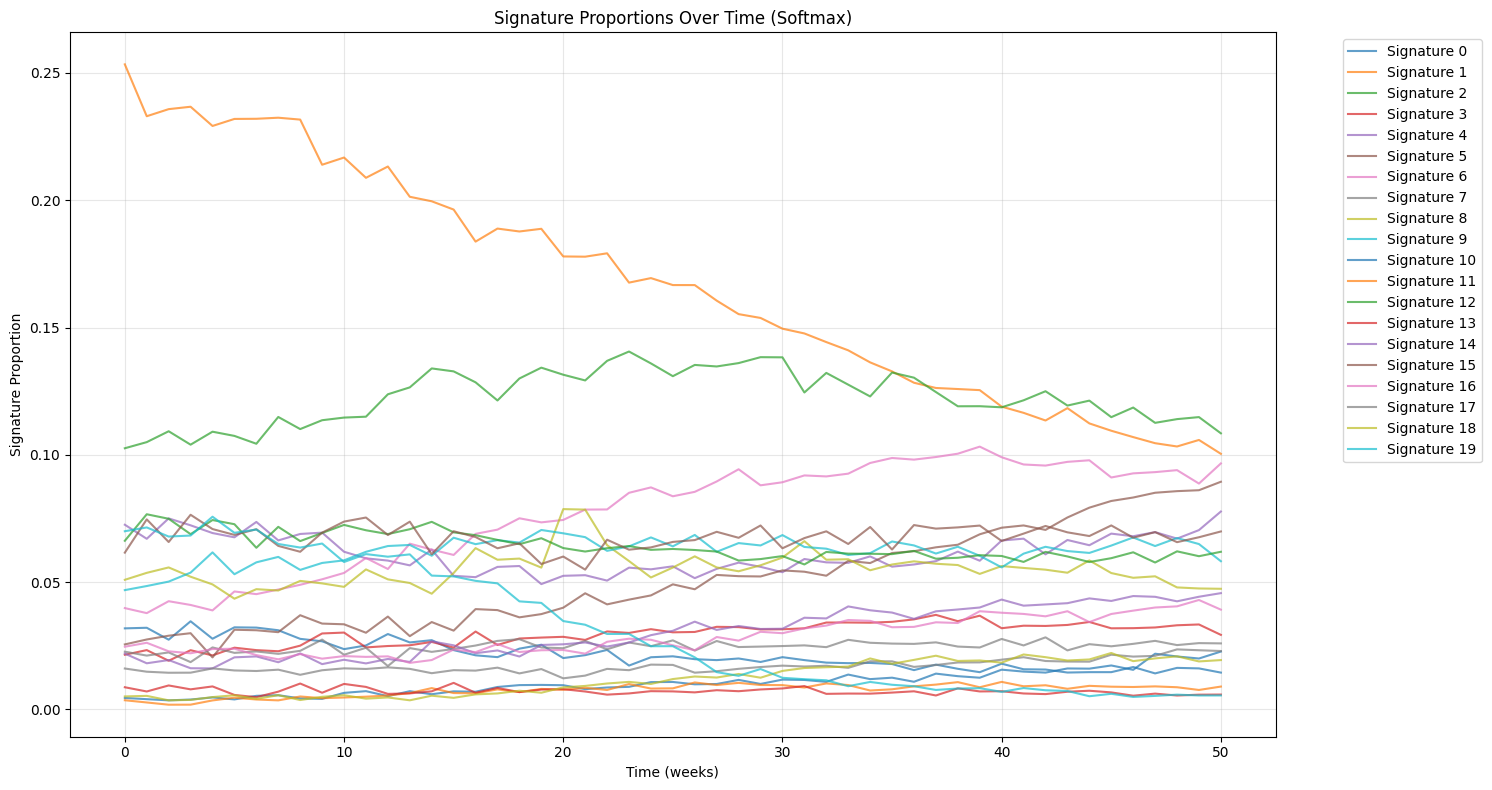


Signature proportion ranges:
Signature 0: 0.048 - 0.049
Signature 1: 0.053 - 0.061
Signature 2: 0.053 - 0.055
Signature 3: 0.049 - 0.049
Signature 4: 0.050 - 0.052
Signature 5: 0.049 - 0.052
Signature 6: 0.049 - 0.053
Signature 7: 0.048 - 0.049
Signature 8: 0.050 - 0.052
Signature 9: 0.050 - 0.051
Signature 10: 0.048 - 0.049
Signature 11: 0.048 - 0.048
Signature 12: 0.050 - 0.051
Signature 13: 0.048 - 0.048
Signature 14: 0.048 - 0.050
Signature 15: 0.050 - 0.051
Signature 16: 0.049 - 0.050
Signature 17: 0.048 - 0.049
Signature 18: 0.048 - 0.049
Signature 19: 0.048 - 0.051


In [198]:

# Calculate signature proportions through time
Y_counts = Y.sum(dim=0)  # Sum over individuals: D x T
signature_props = torch.zeros(20, T)  # (K=20 signatures, T=51 timepoints)

for k in range(20):
    cluster_mask = (initial_clusters == k)
    signature_props[k] = Y_counts[cluster_mask].sum(dim=0) / Y_counts.sum(dim=0)

# Print proportions at first and last timepoint
print("\nEmpirical signature proportions:")
for k in range(20):
    cluster_size = (initial_clusters == k).sum()
    print(f"Signature {k} ({cluster_size} diseases):")
    print(f"  t=0:  {signature_props[k,0]:.3f}")
    print(f"  t=51: {signature_props[k,-1]:.3f}")

# Add healthy proportion and rescale
healthy_prop = 0.05
signature_props = signature_props * (1 - healthy_prop)

import matplotlib.pyplot as plt

# Convert to softmax proportions
def softmax(x):
    exp_x = torch.exp(x - torch.max(x, dim=0)[0])
    return exp_x / exp_x.sum(dim=0)

# Calculate softmax proportions
softmax_props = softmax(signature_props)

# Plot
plt.figure(figsize=(15, 8))
timepoints = range(T)

# Plot each signature
for k in range(20):
    plt.plot(timepoints, signature_props[k], label=f'Signature {k}', alpha=0.7)

plt.xlabel('Time (weeks)')
plt.ylabel('Signature Proportion')
plt.title('Signature Proportions Over Time (Softmax)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print some summary stats
print("\nSignature proportion ranges:")
for k in range(20):
    min_prop = softmax_props[k].min().item()
    max_prop = softmax_props[k].max().item()
    print(f"Signature {k}: {min_prop:.3f} - {max_prop:.3f}")

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_72846/408032137.py:37: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  healthy_ref = torch.ones(T) * logit(torch.tensor(healthy_prop))


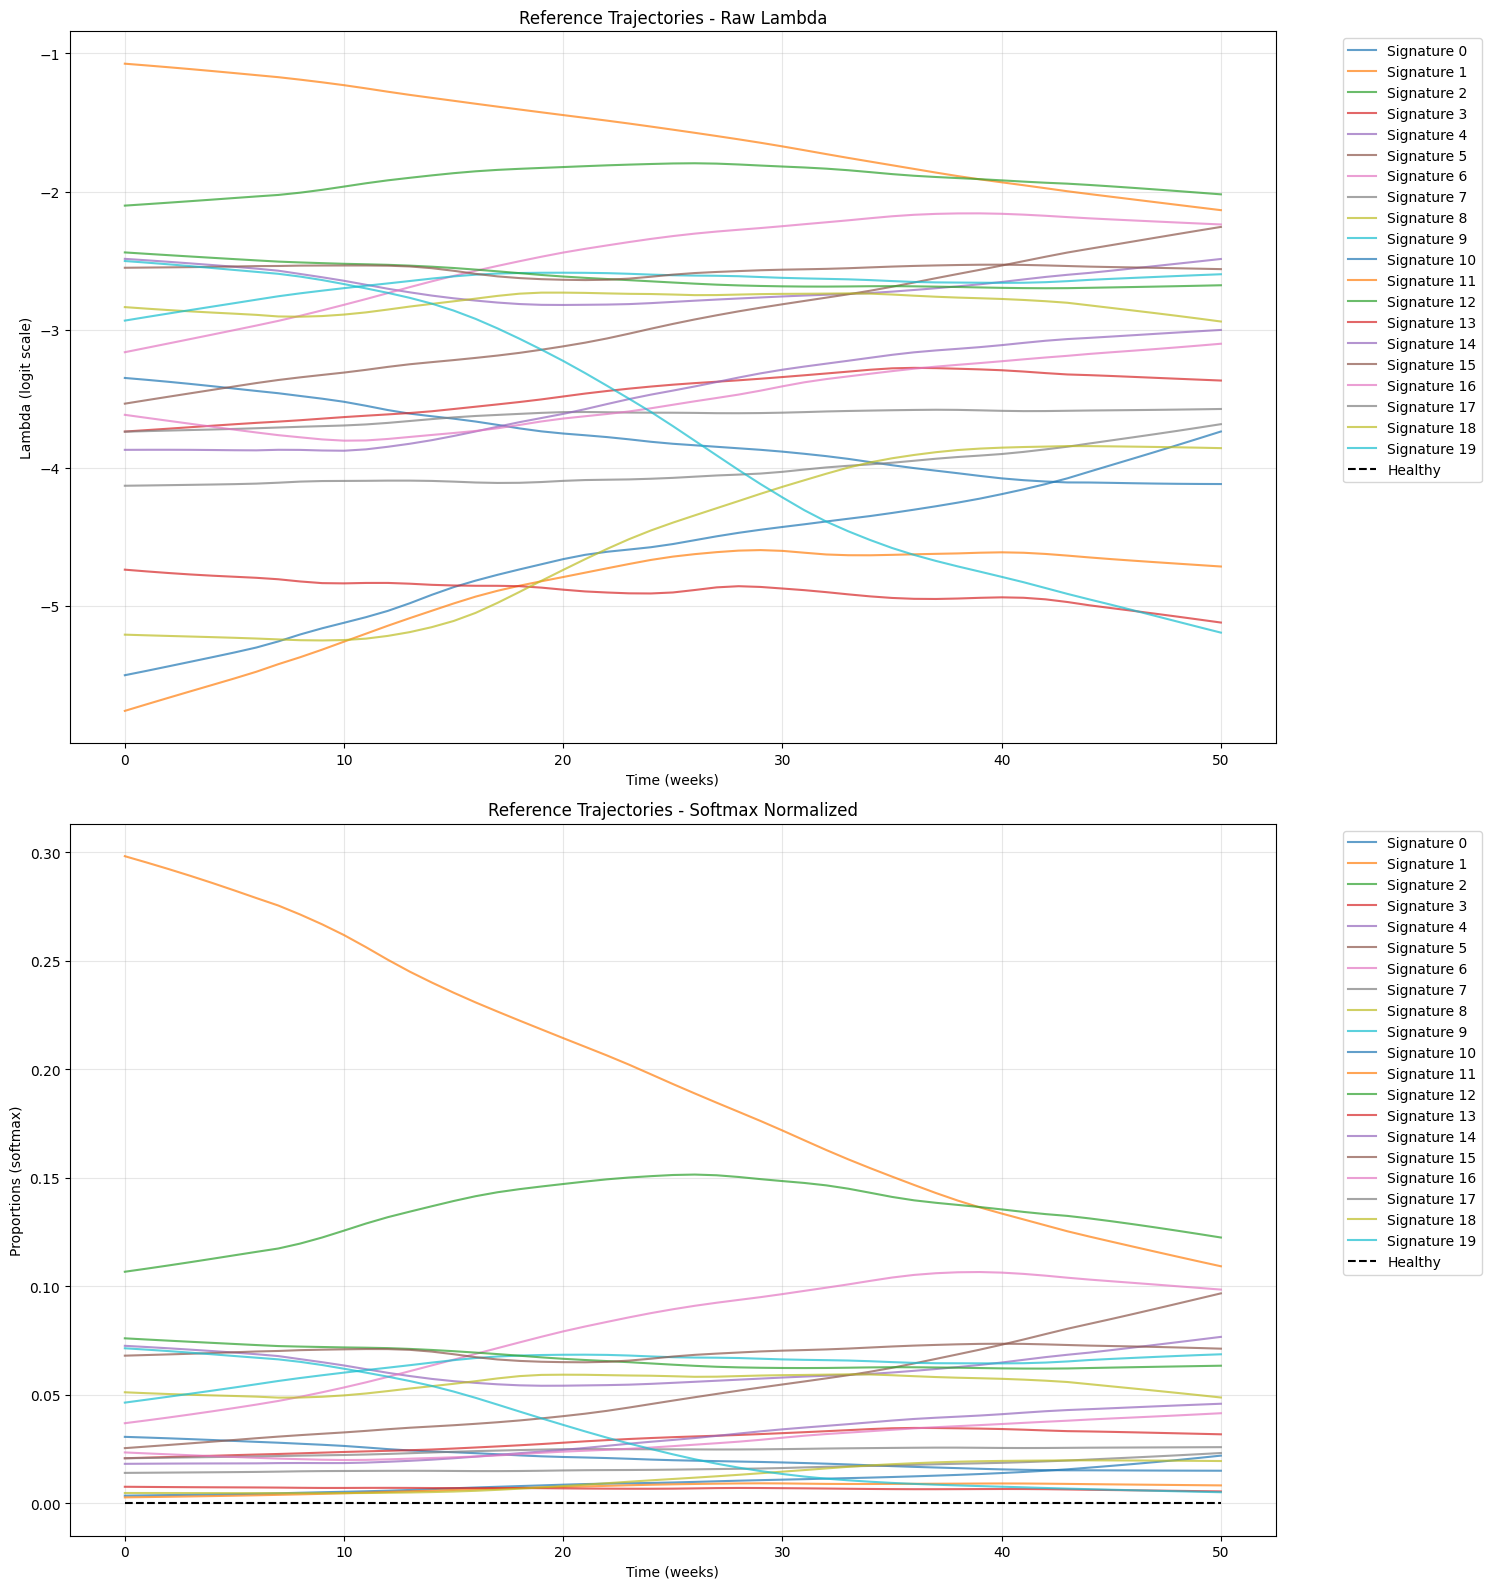

In [199]:
def create_reference_trajectories(Y_filtered, initial_clusters, K, healthy_prop=0, frac=0.3):
    """Create reference trajectories using LOWESS smoothing on logit scale"""
    from statsmodels.nonparametric.smoothers_lowess import lowess
    from scipy.special import logit
    T = Y.shape[2]
    
    # Get raw counts and proportions
    Y_counts = Y.sum(dim=0)  
    signature_props = torch.zeros(K, T)
    total_counts = Y_counts.sum(dim=0) + 1e-8
    
    for k in range(K):
        cluster_mask = (initial_clusters == k)
        signature_props[k] = Y_counts[cluster_mask].sum(dim=0) / total_counts
    
    # Normalize and clamp
    signature_props = torch.clamp(signature_props, min=1e-8, max=1-1e-8)
    signature_props = signature_props / signature_props.sum(dim=0, keepdim=True)
    signature_props *= (1 - healthy_prop)
    
    # Convert to logit and smooth
    logit_props = torch.tensor(logit(signature_props.numpy()))
    signature_refs = torch.zeros_like(logit_props)
    
    times = np.arange(T)
    for k in range(K):
        smoothed = lowess(
            logit_props[k].numpy(), 
            times,
            frac=frac,
            it=3,
            delta=0.0,
            return_sorted=False
        )
        signature_refs[k] = torch.tensor(smoothed)
    
    healthy_ref = torch.ones(T) * logit(torch.tensor(healthy_prop))
    
    return signature_refs, healthy_ref

# Create trajectories
signature_refs, healthy_ref = create_reference_trajectories(Y, initial_clusters, K=20)

# Plot both versions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16))

# Plot 1: Raw smoothed lambda (logit scale)
for k in range(20):
    ax1.plot(range(T), signature_refs[k], label=f'Signature {k}', alpha=0.7)
ax1.plot(range(T), healthy_ref, label='Healthy', color='black', linestyle='--')
ax1.set_xlabel('Time (weeks)')
ax1.set_ylabel('Lambda (logit scale)')
ax1.set_title('Reference Trajectories - Raw Lambda')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Softmax normalized
props = torch.softmax(torch.vstack([signature_refs, healthy_ref]), dim=0)
for k in range(20):
    ax2.plot(range(T), props[k], label=f'Signature {k}', alpha=0.7)
ax2.plot(range(T), props[-1], label='Healthy', color='black', linestyle='--')
ax2.set_xlabel('Time (weeks)')
ax2.set_ylabel('Proportions (softmax)')
ax2.set_title('Reference Trajectories - Softmax Normalized')
ax2.grid(True, alpha=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [200]:
Y = torch.tensor(Y, dtype=torch.float32)
prevalence_t=compute_smoothed_prevalence(Y=Y,window_size=5)


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_72846/808097325.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.float32)


In [201]:
Y_avg = torch.mean(Y, dim=2)
epsilon = 1e-8
Y_avg = torch.log((Y_avg + epsilon)/(1-Y_avg+epsilon))
cluster_diseases = (initial_clusters == 5)
base_value = Y_avg[:, cluster_diseases].mean(dim=1)
G = torch.tensor(G, dtype=torch.float32)
G_centered = G - G.mean(axis=0, keepdims=True)
G_scaled = G_centered / G_centered.std(axis=0, keepdims=True)
G = torch.tensor(G_scaled, dtype=torch.float32)
gamma = torch.linalg.lstsq(G, base_value.unsqueeze(1)).solution.squeeze()



/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_72846/2039274743.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  G = torch.tensor(G_scaled, dtype=torch.float32)


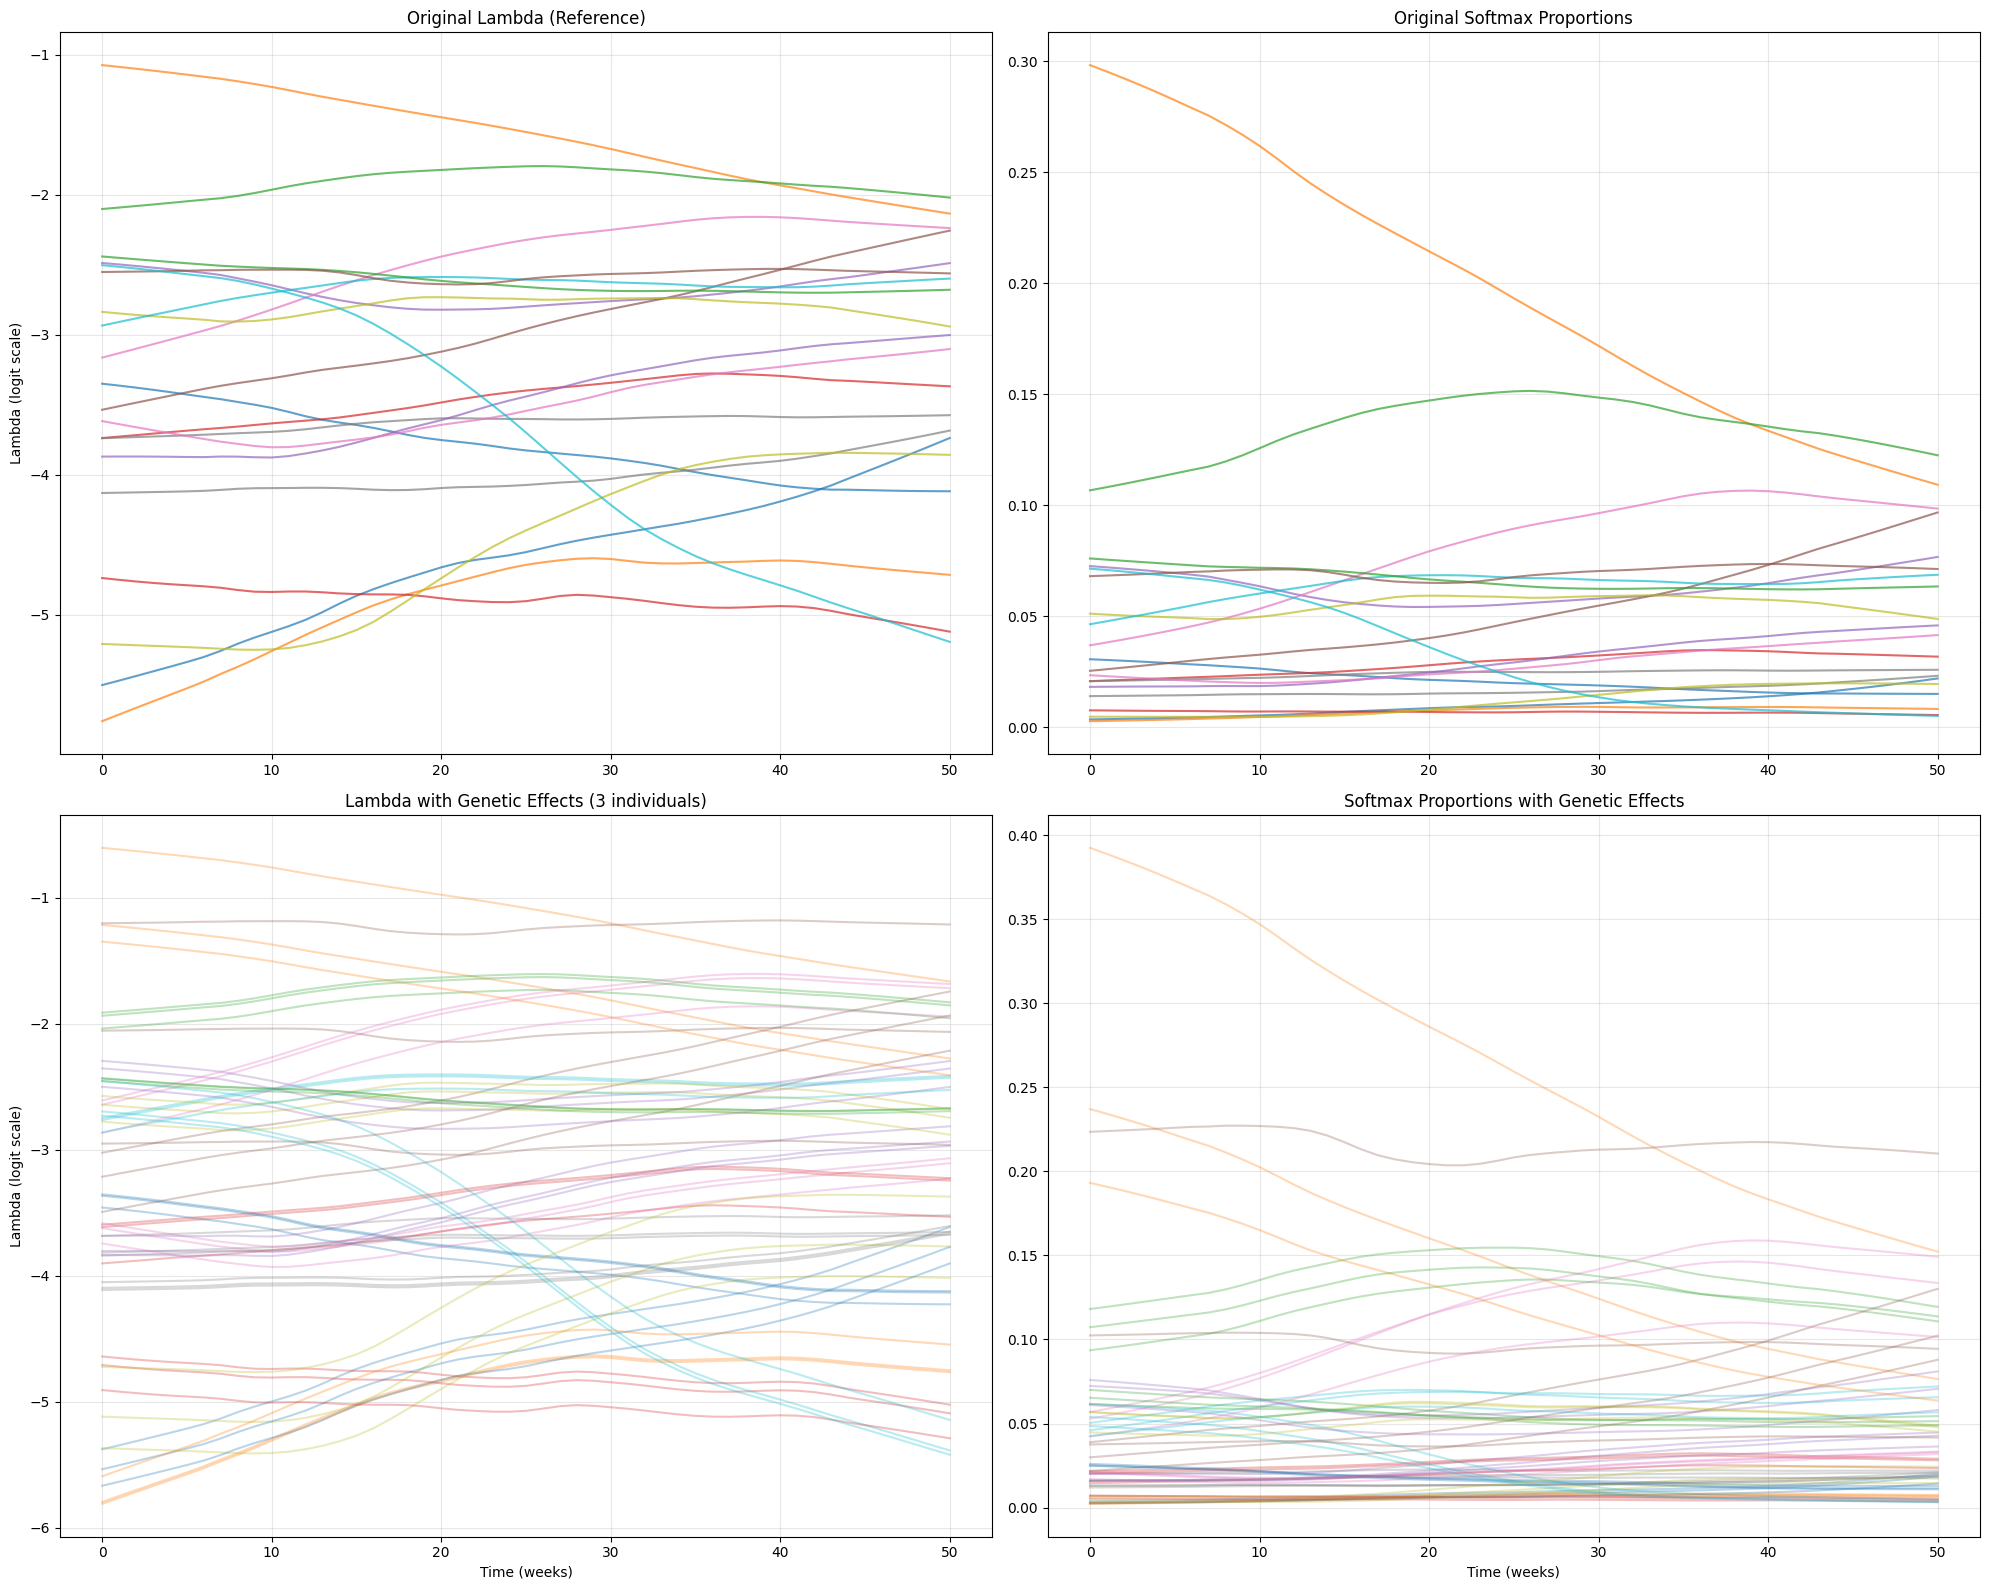


Genetic Effect Statistics:
Mean shift: 0.094
Std of shifts: 0.260
Range of shifts: [-0.399, 1.350]


In [202]:
def visualize_genetic_effects(signature_refs, healthy_ref, G, gamma_real, K=20):
    """
    Visualize reference trajectories with actual gamma values
    """
    # Convert everything to tensors if not already
    if not isinstance(G, torch.Tensor):
        G = torch.tensor(G, dtype=torch.float32)
    if not isinstance(gamma_real, torch.Tensor):
        gamma_real = torch.tensor(gamma_real, dtype=torch.float32)
    
    # Standardize G
    G = (G - G.mean(0)) / G.std(0)
    
    # Calculate genetic shifts for a few example individuals
    n_examples = 3
    example_indices = [0, 100, 200]
    genetic_shifts = 2 * (G[example_indices] @ gamma_real)  # Shape: [n_examples]
    
    T = signature_refs.shape[1]
    
    # Plot original and shifted trajectories
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    
    # Plot 1: Original lambda
    for k in range(K):
        ax1.plot(range(T), signature_refs[k], label=f'Signature {k}', alpha=0.7)
    ax1.set_title('Original Lambda (Reference)')
    ax1.set_ylabel('Lambda (logit scale)')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Original softmax
    props = torch.softmax(torch.vstack([signature_refs, healthy_ref]), dim=0)
    for k in range(K):
        ax2.plot(range(T), props[k], label=f'Signature {k}', alpha=0.7)
    ax2.set_title('Original Softmax Proportions')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Shifted lambda for example individuals
    for i, idx in enumerate(example_indices):
        # Add genetic shift as a scalar to all timepoints
        shifted_refs = signature_refs + genetic_shifts[i].reshape(-1, 1)  # Reshape to broadcast correctly
        for k in range(K):
            ax3.plot(range(T), shifted_refs[k], alpha=0.3)
    ax3.set_title('Lambda with Genetic Effects (3 individuals)')
    ax3.set_xlabel('Time (weeks)')
    ax3.set_ylabel('Lambda (logit scale)')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Shifted softmax for example individuals
    for i, idx in enumerate(example_indices):
        shifted_refs = signature_refs + genetic_shifts[i].reshape(-1, 1)  # Reshape to broadcast correctly
        props = torch.softmax(torch.vstack([shifted_refs, healthy_ref]), dim=0)
        for k in range(K):
            ax4.plot(range(T), props[k], alpha=0.3)
    ax4.set_title('Softmax Proportions with Genetic Effects')
    ax4.set_xlabel('Time (weeks)')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print stats about actual genetic effects
    print("\nGenetic Effect Statistics:")
    print(f"Mean shift: {genetic_shifts.mean():.3f}")
    print(f"Std of shifts: {genetic_shifts.std():.3f}")
    print(f"Range of shifts: [{genetic_shifts.min():.3f}, {genetic_shifts.max():.3f}]")


visualize_genetic_effects(signature_refs, healthy_ref, G, model.gamma.detach().numpy(), K=20)


G matrix scaling check:
Mean should be ~0: 0.000000
Std should be ~1: 0.000014


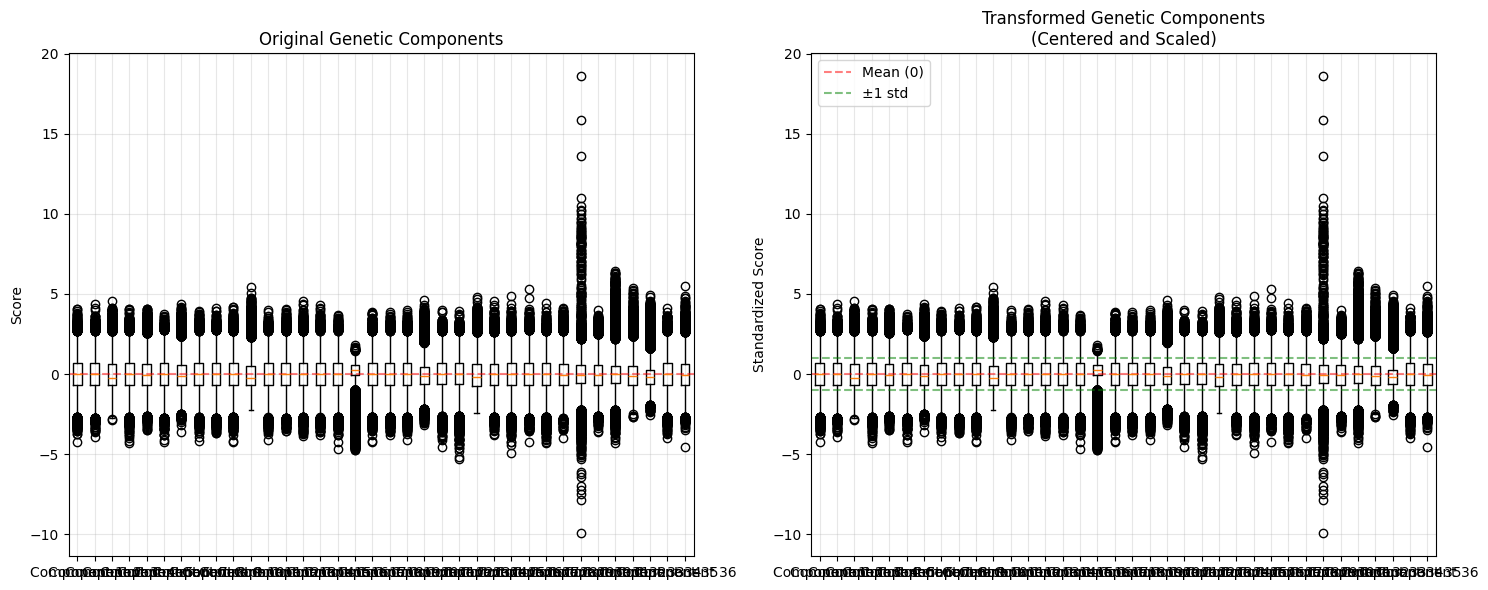


Genetic Components Summary Statistics:
Component  Original Mean Original Std  Trans. Mean  Trans. Std
------------------------------------------------------------
1                  0.000        1.000        0.000       1.000
2                  0.000        1.000       -0.000       1.000
3                  0.000        1.000        0.000       1.000
4                 -0.000        1.000        0.000       1.000
5                 -0.000        1.000       -0.000       1.000
6                  0.000        1.000        0.000       1.000
7                 -0.000        1.000       -0.000       1.000
8                 -0.000        1.000       -0.000       1.000
9                 -0.000        1.000       -0.000       1.000
10                -0.000        1.000        0.000       1.000
11                 0.000        1.000        0.000       1.000
12                 0.000        1.000        0.000       1.000
13                -0.000        1.000        0.000       1.000
14               

In [61]:
# Check G matrix scaling
G_mean = model.G.mean(dim=0)
G_std = model.G.std(dim=0)
print("\nG matrix scaling check:")
print(f"Mean should be ~0: {G_mean.abs().max().item():.6f}")
print(f"Std should be ~1: {(G_std - 1).abs().max().item():.6f}")
# When initializing the model:




# Plot both versions:
model.plot_genetic_scores(G)
print(model.G[:,3].mean())

print(G[:,3].mean())


# Check G matrix scaling
G_mean = model.G.mean(dim=0)
G_std = model.G.std(dim=0)
print("\nG matrix scaling check:")
print(f"Mean should be ~0: {G_mean.abs().max().item():.6f}")
print(f"Std should be ~1: {(G_std - 1).abs().max().item():.6f}")



In [203]:

%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from clust_huge_amp import *

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y.shape[0],
    D=Y.shape[1], 
    T=Y.shape[2], 
    K=20,
    P=G.shape[1],
    init_sd_scaler=1e-1,
    G=G, 
    Y=Y,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=prevalence_t,
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names='disease_names'
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=psi1)
model.clusters = initial_clusters
# Verify clusters match
clusters_match = np.array_equal(initial_clusters, model.clusters)
print(f"\nClusters match exactly: {clusters_match}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.signature_refs = torch.tensor(signature_references, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G_scaled, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts


Cluster Sizes:
Cluster 0: 6 diseases
Cluster 1: 28 diseases
Cluster 2: 24 diseases
Cluster 3: 11 diseases
Cluster 4: 24 diseases
Cluster 5: 20 diseases
Cluster 6: 15 diseases
Cluster 7: 16 diseases
Cluster 8: 19 diseases
Cluster 9: 13 diseases
Cluster 10: 7 diseases
Cluster 11: 7 diseases
Cluster 12: 68 diseases
Cluster 13: 7 diseases
Cluster 14: 13 diseases
Cluster 15: 12 diseases
Cluster 16: 16 diseases
Cluster 17: 8 diseases
Cluster 18: 12 diseases
Cluster 19: 20 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 6
Base value (first 5): tensor([-18.4207, -18.4207, -18.4207, -18.4207, -18.4207])
Base value centered (first 5): tensor([-1.1301, -1.1301, -1.1301, -1.1301, -1.1301])
Base value centered mean: 1.4344814189826138e-06
Gamma init for k=0 (first 5): tensor([ 0.0063,  0.0153, -0.0103,  0.0724,  0.0013])

Calculating gamma for k=1:
Number of diseases in cluster: 28
Base value (first 5): tensor([-18.4207, -16.8662, -18.4207, -17.9025, -18.4207])
Base value cente

In [67]:
import cProfile
import pstats
from pstats import SortKey

# For the healthtoo version
profiler = cProfile.Profile()
profiler.enable()
history_new = model.fit(E, num_epochs=200, learning_rate=1e-1, lambda_reg=1e-2)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats(SortKey.CUMULATIVE)
stats.print_stats(20)
        

Kappa gradient: -1.570e+01

Epoch 0
Loss: 170.6277

Monitoring signature responses:

Disease 88 (signature 16, LR=29.40):
  Theta for diagnosed: 0.030 ± 0.010
  Theta for others: 0.028
  Proportion difference: 0.001

Disease 5 (signature 4, LR=29.25):
  Theta for diagnosed: 0.063 ± 0.012
  Theta for others: 0.062
  Proportion difference: 0.001

Disease 133 (signature 10, LR=28.95):
  Theta for diagnosed: 0.010 ± 0.005
  Theta for others: 0.010
  Proportion difference: 0.000

Disease 205 (signature 8, LR=28.13):
  Theta for diagnosed: 0.055 ± 0.011
  Theta for others: 0.054
  Proportion difference: 0.000

Disease 161 (signature 14, LR=28.08):
  Theta for diagnosed: 0.030 ± 0.012
  Theta for others: 0.030
  Proportion difference: 0.001
Kappa gradient: -1.358e+01

Epoch 1
Loss: 783.2890

Monitoring signature responses:

Disease 88 (signature 16, LR=29.37):
  Theta for diagnosed: 0.030 ± 0.010
  Theta for others: 0.028
  Proportion difference: 0.001

Disease 5 (signature 4, LR=29.26):
  Th

In [ ]:
import torch
import pandas as pd
import numpy as np
from pathlib import Path

# Load model and essentials
model_path = "/Users/sarahurbut/Dropbox (Personal)/model.pt"  # Update this path
essentials_path = "path/to/model_essentials.pt"  # Update this path

# Load model
model = torch.load(model_path)

In [68]:
model.kappa

Parameter containing:
tensor([2.9599], requires_grad=True)

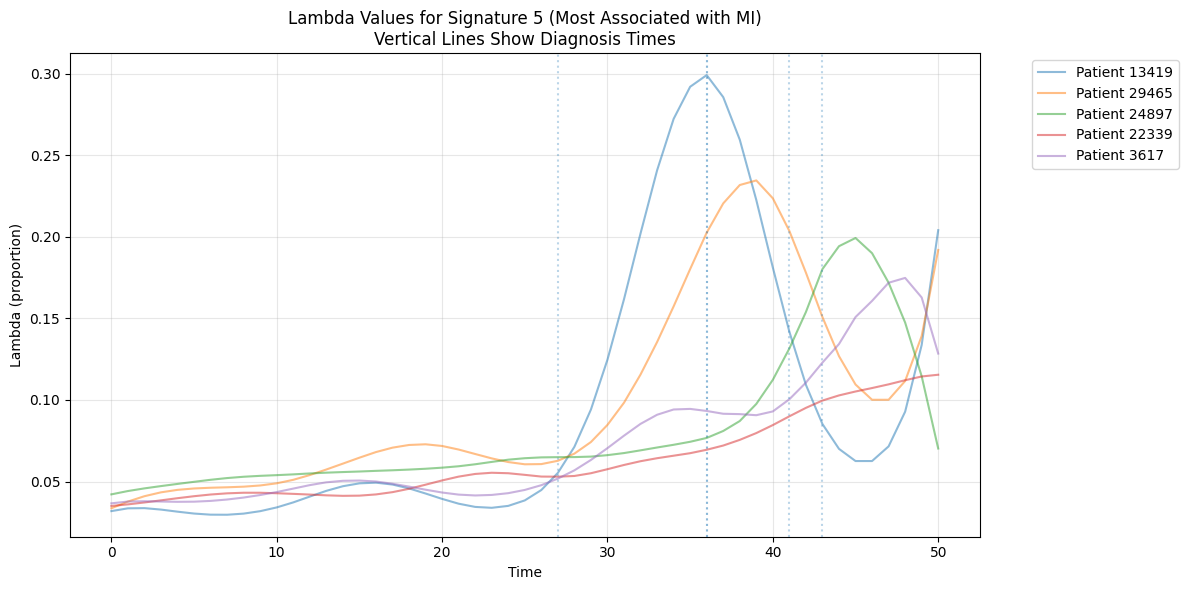

In [69]:
def plot_disease_lambda_alignment(model):
    """
    Plot lambda values aligned with disease occurrences for selected patients
    """
    # Find patients with specific diseases and their diagnosis times
    disease_idx = 112  # MI
    patients_with_disease = []
    diagnosis_times = []
    
    for patient in range(model.Y.shape[0]):
        diag_time = torch.where(model.Y[patient, disease_idx])[0]
        if len(diag_time) > 0:
            patients_with_disease.append(patient)
            diagnosis_times.append(diag_time[0].item())
    
    # Sample a few patients
    n_samples = min(5, len(patients_with_disease))
    sample_indices = np.random.choice(len(patients_with_disease), n_samples, replace=False)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 6))
    time_points = np.arange(model.T)
    
    # Find signature that most strongly associates with this disease
    psi_disease = model.psi[:, disease_idx].detach()
    sig_idx = torch.argmax(psi_disease).item()
    
    # Plot for each sampled patient
    for idx in sample_indices:
        patient = patients_with_disease[idx]
        diag_time = diagnosis_times[idx]
        
        # Plot lambda (detached)
        lambda_values = torch.softmax(model.lambda_[patient].detach(), dim=0)[sig_idx]
        ax.plot(time_points, lambda_values.numpy(),
                alpha=0.5, label=f'Patient {patient}')
        
        # Mark diagnosis time
        ax.axvline(x=diag_time, linestyle=':', alpha=0.3)
    
    ax.set_title(f'Lambda Values for Signature {sig_idx} (Most Associated with MI)\nVertical Lines Show Diagnosis Times')
    ax.set_xlabel('Time')
    ax.set_ylabel('Lambda (proportion)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_disease_lambda_alignment(model)

In [70]:
def plot_training_evolution(history_tuple):
    losses, gradient_history = history_tuple
    
    plt.figure(figsize=(15, 5))
    
    # Plot loss
    plt.subplot(1, 3, 1)
    plt.plot(losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Evolution')
    plt.yscale('log')
    plt.legend()
    
    # Plot lambda gradients
    plt.subplot(1, 3, 2)
    lambda_norms = [torch.norm(g).item() for g in gradient_history['lambda_grad']]
    plt.plot(lambda_norms, label='Lambda gradients')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient norm')
    plt.title('Lambda Gradient Evolution')
    plt.legend()
    
    # Plot phi gradients
    plt.subplot(1, 3, 3)
    phi_norms = [torch.norm(g).item() for g in gradient_history['phi_grad']]
    plt.plot(phi_norms, label='Phi gradients')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient norm')
    plt.title('Phi Gradient Evolution')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

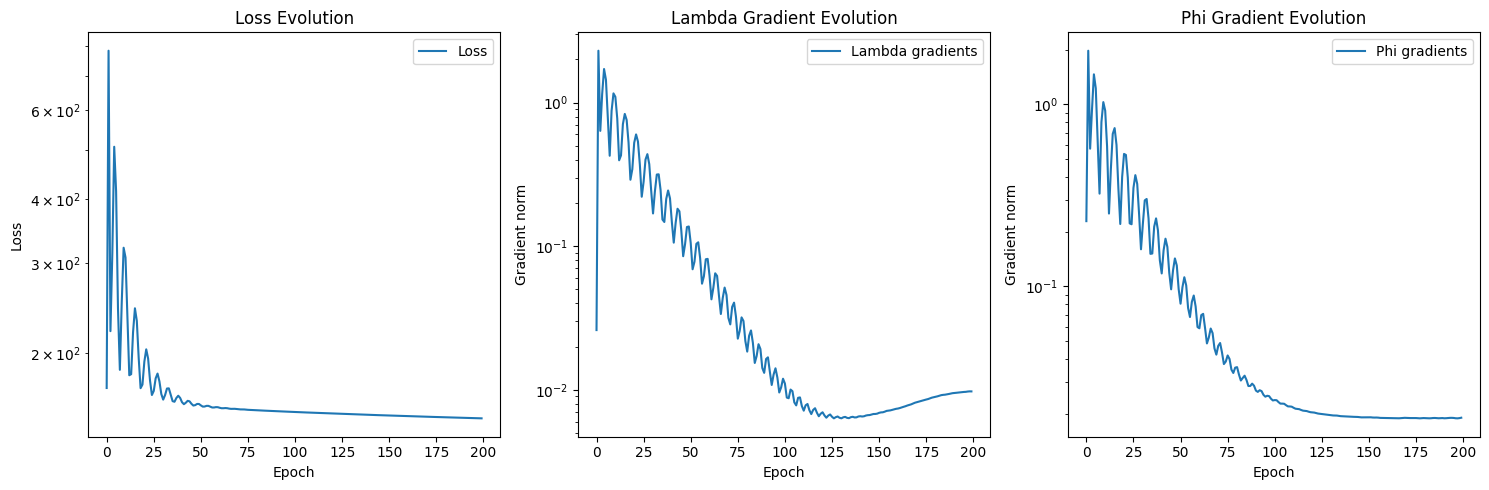

In [71]:
plot_training_evolution(history_new)

In [74]:
## do the cluster assignemtns still map?


# Get the signature with maximum psi for each disease
max_psi_indices = torch.argmax(model.psi, dim=0)  # Shape: [D]

# Compare with cluster assignments
matches = 0
total = len(model.clusters)

print("Comparing max psi signatures with cluster assignments:")
for k in range(model.K):
    # Find diseases assigned to cluster k
    cluster_diseases = np.where(model.clusters == k)[0]
    # Find diseases where k has maximum psi
    max_psi_diseases = np.where(max_psi_indices == k)[0]
    
    overlap = set(cluster_diseases) & set(max_psi_diseases)
    
    print(f"\nCluster {k}:")
    print(f"Number of diseases in cluster: {len(cluster_diseases)}")
    print(f"Number of diseases where this signature has max psi: {len(max_psi_diseases)}")
    print(f"Overlap: {len(overlap)}")
    
    matches += len(overlap)

print(f"\nOverall agreement: {matches}/{total} diseases ({matches/total*100:.1f}%)")

Comparing max psi signatures with cluster assignments:

Cluster 0:
Number of diseases in cluster: 6
Number of diseases where this signature has max psi: 6
Overlap: 6

Cluster 1:
Number of diseases in cluster: 28
Number of diseases where this signature has max psi: 28
Overlap: 28

Cluster 2:
Number of diseases in cluster: 24
Number of diseases where this signature has max psi: 24
Overlap: 24

Cluster 3:
Number of diseases in cluster: 11
Number of diseases where this signature has max psi: 11
Overlap: 11

Cluster 4:
Number of diseases in cluster: 24
Number of diseases where this signature has max psi: 24
Overlap: 24

Cluster 5:
Number of diseases in cluster: 20
Number of diseases where this signature has max psi: 20
Overlap: 20

Cluster 6:
Number of diseases in cluster: 15
Number of diseases where this signature has max psi: 15
Overlap: 15

Cluster 7:
Number of diseases in cluster: 16
Number of diseases where this signature has max psi: 16
Overlap: 16

Cluster 8:
Number of diseases in cl

In [76]:
clusters_match = np.array_equal(initial_clusters, model.clusters)
print(f"\nClusters match exactly: {clusters_match}")


Clusters match exactly: True


In [89]:
clusters

array([12, 12,  4,  4,  4,  4,  4, 15,  1,  4,  8,  8, 12, 14, 15, 15,  3,
        3, 19, 12, 12, 18, 12, 18, 11, 11, 11, 11, 11, 11, 11, 12, 12,  8,
       12,  7, 12, 12, 12, 15, 19, 12, 15, 12, 12, 12,  6,  6,  6,  6,  4,
        6,  6,  6, 12,  4,  6,  1,  4,  4,  1,  4,  4,  4,  4,  1,  1,  1,
        1,  1,  1,  1,  1, 12,  9, 12,  1, 10, 12,  2, 12,  1, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 12, 12, 16, 12, 12, 16,
       12, 12, 12,  5,  5,  5,  5,  6,  6,  5,  5,  1,  5,  5,  4,  5, 12,
        5,  5,  5,  5,  5,  5,  5,  5, 12,  5,  5, 10, 10, 10, 10, 12, 10,
       10, 12, 12,  6, 12, 12, 12,  8,  4,  4,  1,  1,  0,  0,  0, 12, 12,
        0,  0,  0, 14, 14, 14,  1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12,
       12,  1,  1,  1,  1, 12, 12,  7,  1,  7,  7,  7,  7,  7,  7,  7,  7,
       12,  7,  7,  7, 12, 18,  7, 12,  8,  8,  8, 12,  8,  8,  8,  1,  8,
        1,  8,  8,  8,  8,  8,  8,  1,  1, 13, 13, 13, 13, 13, 13, 13, 12,
        7,  8,  8,  7, 12

In [134]:
def plot_theta_differences(model, disease_names):
    """Plot theta distributions for key diseases and their most associated signatures."""
    # Define diseases of interest by name
    disease_names_of_interest = [
        'Myocardial infarction',
        'Malignant neoplasm of female breast',
        'Gastric ulcer',
        'Type 2 diabetes'
    ]
    
    # Find disease indices
    disease_indices = []
    for disease_name in disease_names_of_interest:
        matches = [i for i, name in enumerate(disease_names) if name == disease_name]
        if matches:
            disease_indices.append(matches[0])
        else:
            print(f"Warning: Disease '{disease_name}' not found in disease_names")
            continue
    
    # Find most associated signature for each disease
    psi = model.psi.detach().cpu()
    signatures = [torch.argmax(psi[:, d]).item() for d in disease_indices]
    
    # Create plot
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (d, sig) in enumerate(zip(disease_indices, signatures)):
        ax = axes[i]
        
        # Get diagnosis times
        diagnosis_mask = model.Y[:, d, :].bool().cpu()
        
        # Get thetas
        with torch.no_grad():
            pi, theta, phi_prob = model.forward()
            theta = theta.cpu()
        
        # Plot distributions
        diagnosed_theta = theta[diagnosis_mask, sig].numpy()
        others_theta = theta[~diagnosis_mask, sig].numpy()
        
        ax.hist(diagnosed_theta, alpha=0.5, label='At diagnosis', density=True)
        ax.hist(others_theta, alpha=0.5, label='Others', density=True)
        
        # Use disease_names parameter instead of model.disease_names
        ax.set_title(f'{disease_names[d]}\n(Signature {sig})')
        ax.set_xlabel('Theta')
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

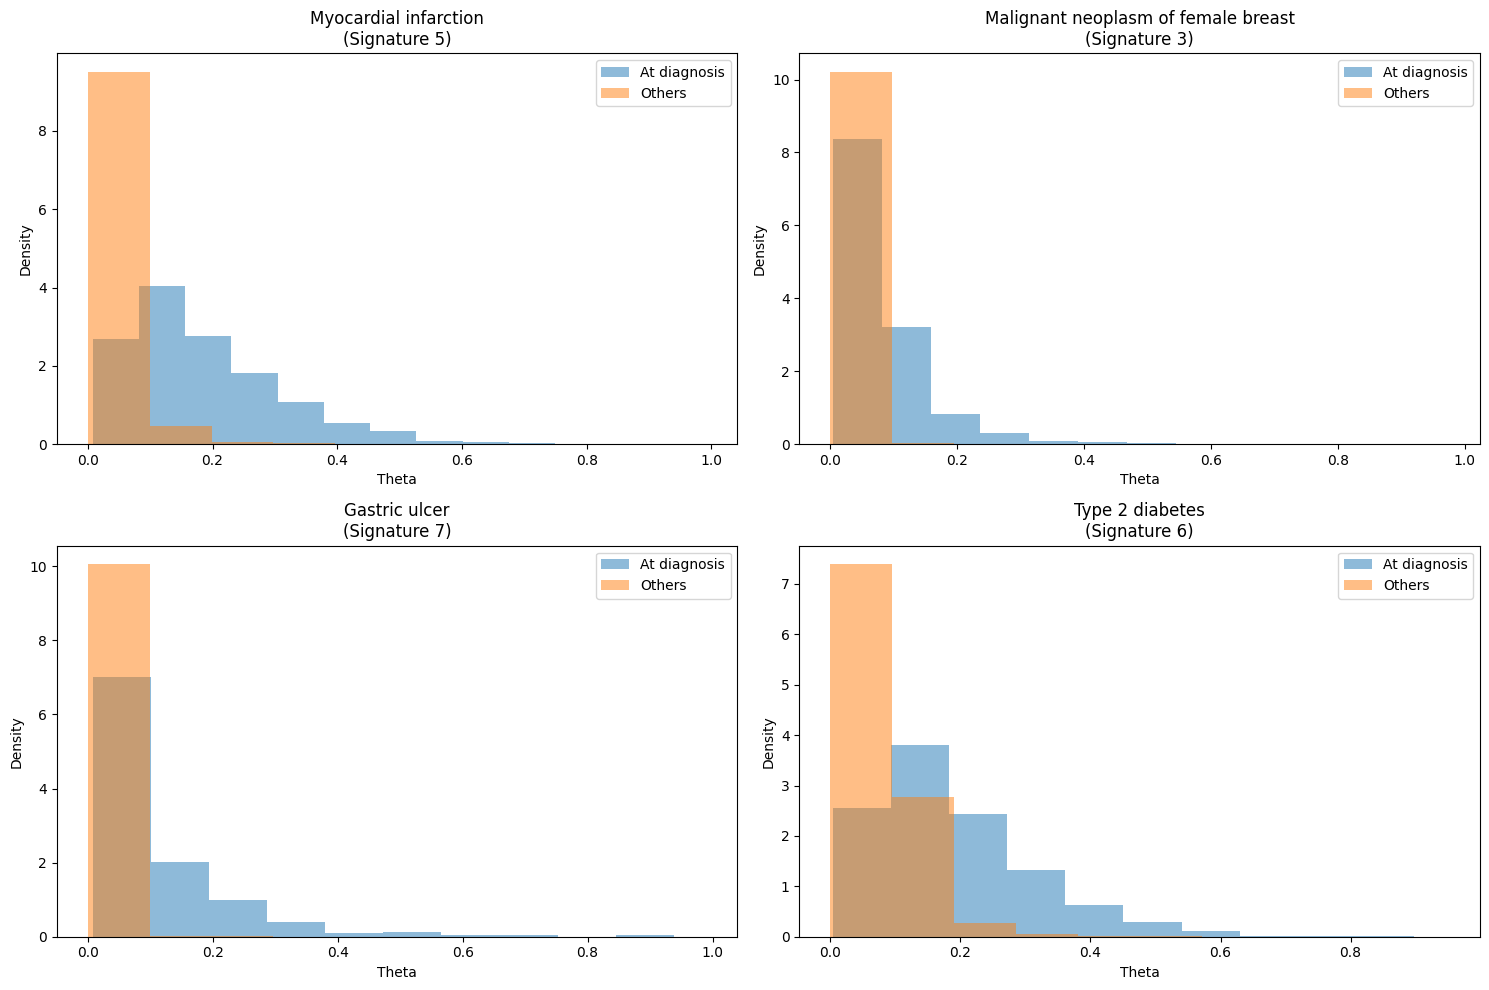

In [135]:
plot_theta_differences(model, disease_names)

In [102]:
def plot_theta_differences(model, disease_names):
    """Plot theta distributions for key diseases and their most associated signatures."""
    # Define diseases of interest by name
    disease_names_of_interest = [
        'Myocardial infarction',
        'Malignant neoplasm of female breast',
        
        'Type 2 diabetes'
    ]
    
    # Find disease indices
  # Find disease indices
    disease_indices = []
    for disease_name in disease_names_of_interest:
        matches = [i for i, name in enumerate(disease_names) if name == disease_name]
        if matches:
            disease_indices.append(matches[0])
        else:
            print(f"Warning: Disease '{disease_name}' not found in disease_names")
            continue
    
    # Find most associated signature for each disease
    psi = model.psi.detach().cpu()
    signatures = [torch.argmax(psi[:, d]).item() for d in disease_indices]
    
    # Create plot
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (d, sig) in enumerate(zip(disease_indices, signatures)):
        ax = axes[i]
        
        # Get diagnosis times
        diagnosis_mask = model.Y[:, d, :].bool().cpu()
        
        # Get thetas
        with torch.no_grad():
            pi, theta, phi_prob = model.forward()
            theta = theta.cpu()
        
        # Plot distributions
        diagnosed_theta = theta[diagnosis_mask, sig].numpy()
        others_theta = theta[~diagnosis_mask, sig].numpy()
        
        ax.hist(diagnosed_theta, alpha=0.5, label='At diagnosis', density=True)
        ax.hist(others_theta, alpha=0.5, label='Others', density=True)
        
        ax.set_title(f'{model.disease_names[d]}\n(Signature {sig})')
        ax.set_xlabel('Theta')
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout()
    plt.show()



In [105]:
type(model.disease_names)

str

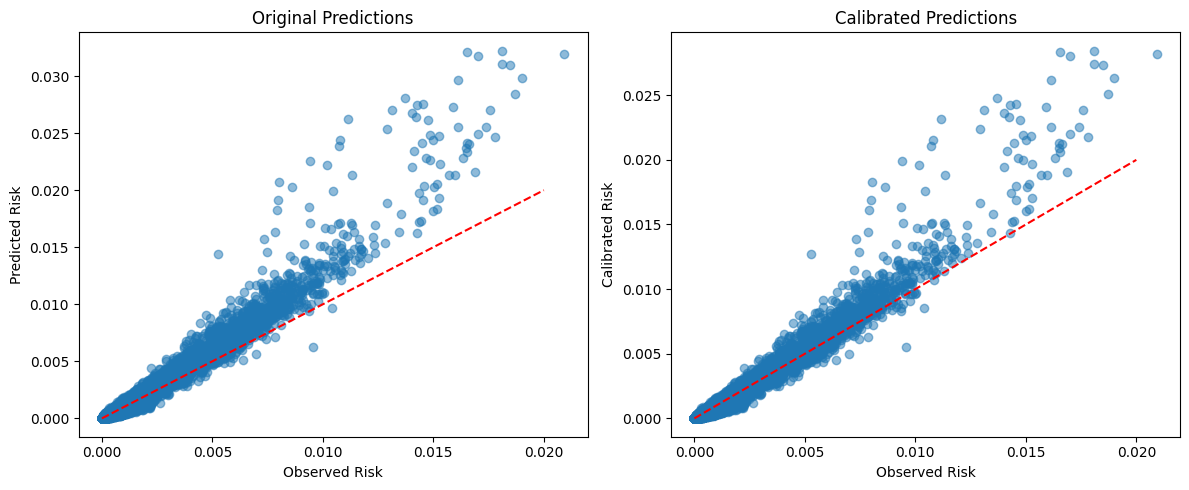

Mean observed risk: 0.001297
Mean predicted risk (original): 0.001470
Mean predicted risk (calibrated): 0.001297
Calibration scale factor: 0.883


In [106]:
# 1. Get predictions and actual values
predicted = model.forward()
pi_pred = predicted[0] if isinstance(predicted, tuple) else predicted
pi_pred = pi_pred.cpu().detach().numpy()
Y = model.Y.cpu().detach().numpy()

# 2. Calculate marginal risks directly
# Assuming dimensions are: [N, D, T] for both Y and pi_pred
observed_risk = Y.mean(axis=0).flatten()  # average across individuals
predicted_risk = pi_pred.mean(axis=0).flatten()
#observed_risk=mu_dt_flat
# 3. Apply calibration
scale_factor = np.mean(observed_risk) / np.mean(predicted_risk)
calibrated_risk = predicted_risk * scale_factor

# 4. Plot
plt.figure(figsize=(12, 5))

# Original predictions
plt.subplot(121)
plt.scatter(observed_risk, predicted_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Original Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Predicted Risk')

# Calibrated predictions
plt.subplot(122)
plt.scatter(observed_risk, calibrated_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Calibrated Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Calibrated Risk')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Mean observed risk: {np.mean(observed_risk):.6f}")
print(f"Mean predicted risk (original): {np.mean(predicted_risk):.6f}")
print(f"Mean predicted risk (calibrated): {np.mean(calibrated_risk):.6f}")
print(f"Calibration scale factor: {scale_factor:.3f}")


In [137]:

ss_res = np.sum((observed_risk - calibrated_risk) ** 2)
ss_tot = np.sum((observed_risk - np.mean(observed_risk)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"R^2: {r2:.3f}")

R^2: 0.903


In [ ]:
model=torch

In [110]:
def plot_signature_temporal_patterns(model, disease_names, n_top=10, selected_signatures=None):
    """Show temporal patterns of top diseases for each signature"""
    phi = model.phi.detach().numpy()
    prevalence_logit = model.logit_prev_t.detach().numpy()
    import os
    phi_centered = np.zeros_like(phi)
    for k in range(phi.shape[0]):
        for d in range(phi.shape[1]):
            phi_centered[k, d, :] = phi[k, d, :] - prevalence_logit[d, :]
    
    phi_avg = phi_centered.mean(axis=2)
    
    if selected_signatures is None:
        selected_signatures = range(phi_avg.shape[0])
    
    n_sigs = len(selected_signatures)
    fig, axes = plt.subplots(n_sigs, 1, figsize=(15, 5*n_sigs))
    if n_sigs == 1:
        axes = [axes]
    
    for i, k in enumerate(selected_signatures):
        scores = phi_avg[k, :]
        top_indices = np.argsort(scores)[-n_top:][::-1]
        
        ax = axes[i]
        for idx in top_indices:
            temporal_pattern = phi[k, idx, :]
            disease_name = disease_names[idx]
            ax.plot(temporal_pattern, label=disease_name)
        
        ax.set_title(f'Signature {k} - Top Disease Temporal Patterns')
        ax.set_xlabel('Time')
        ax.set_ylabel('Phi Value')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    #plt.savefig(os.path.join(plot_dir, 'temporal_patterns_withkappa.png'))
    plt.show()

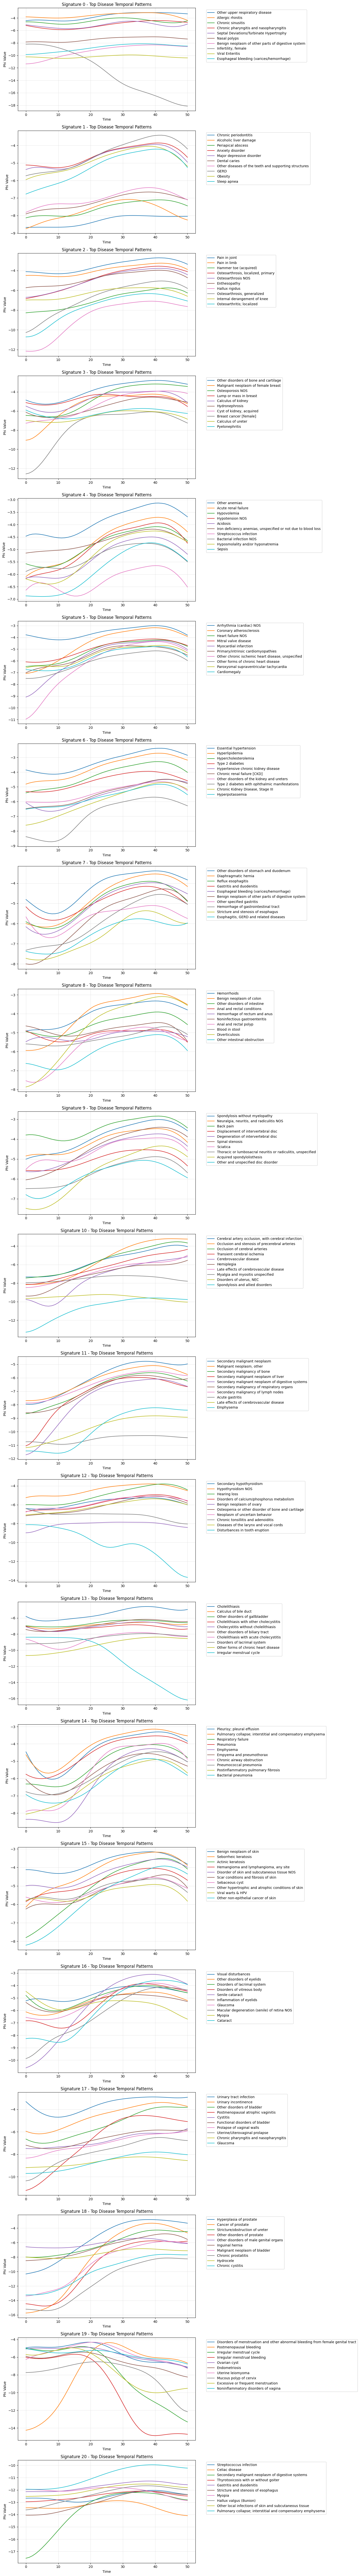

In [111]:
plot_signature_temporal_patterns(model, disease_names, n_top=10, selected_signatures=None)

In [113]:
model.K=21

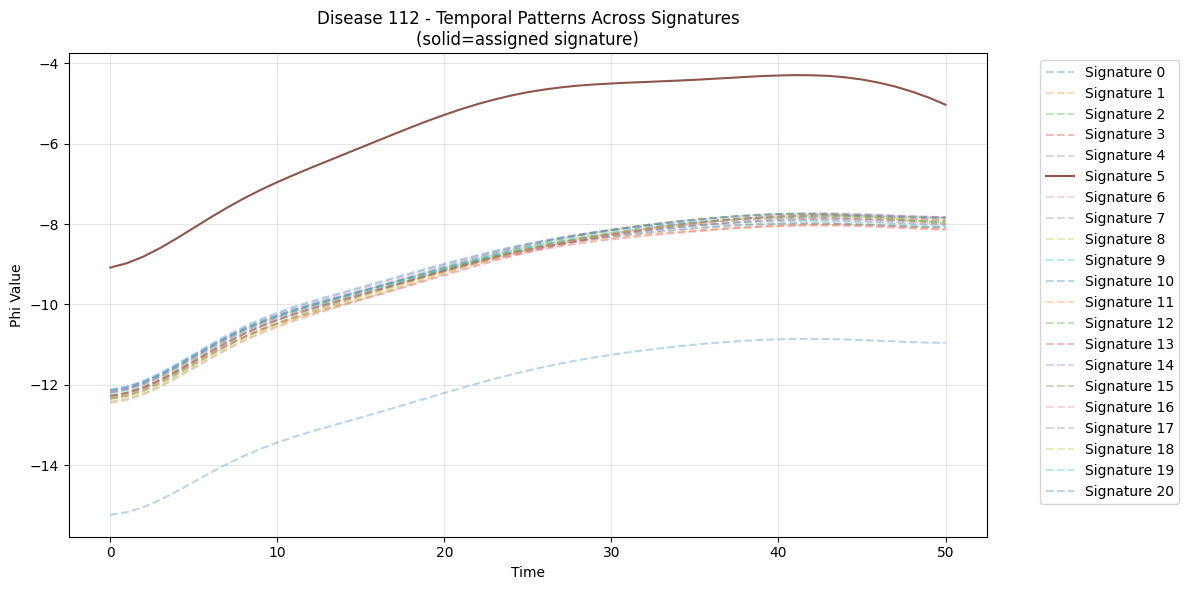


Psi values for disease 112:
Signature 0: -2.067
Signature 1: -2.590
Signature 2: -2.234
Signature 3: -2.294
Signature 4: -2.067
Signature 5: -0.759
Signature 6: -2.115
Signature 7: -2.111
Signature 8: -2.171
Signature 9: -2.137
Signature 10: -2.026
Signature 11: -1.993
Signature 12: -1.878
Signature 13: -2.060
Signature 14: -1.868
Signature 15: -2.043
Signature 16: -2.272
Signature 17: -2.105
Signature 18: -2.257
Signature 19: -1.944
Signature 20: -5.010


In [114]:
def plot_disease_signature_patterns(model, disease_idx=112):
    plt.figure(figsize=(12, 6))
    time_points = np.arange(model.T)
    
    # Get phi values for this disease across all signatures
    phi_disease = model.phi[:, disease_idx].detach()  # [K, T]
    psi_disease = model.psi[:, disease_idx].detach()  # [K]
    
    # Plot phi trajectories
    for k in range(model.K):
        # Make the assigned signature (highest psi) stand out
        is_assigned = (psi_disease[k] == psi_disease.max())
        alpha = 1.0 if is_assigned else 0.3
        linestyle = '-' if is_assigned else '--'
        
        plt.plot(time_points, phi_disease[k], 
                label=f'Signature {k}', 
                alpha=alpha,
                linestyle=linestyle)
    
    plt.title(f'Disease {disease_idx} - Temporal Patterns Across Signatures\n(solid=assigned signature)')
    plt.xlabel('Time')
    plt.ylabel('Phi Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print psi values
    print(f"\nPsi values for disease {disease_idx}:")
    for k in range(model.K):
        print(f"Signature {k}: {psi_disease[k]:.3f}")

# Call the function for MI (disease 112)
plot_disease_signature_patterns(model, disease_idx=112)

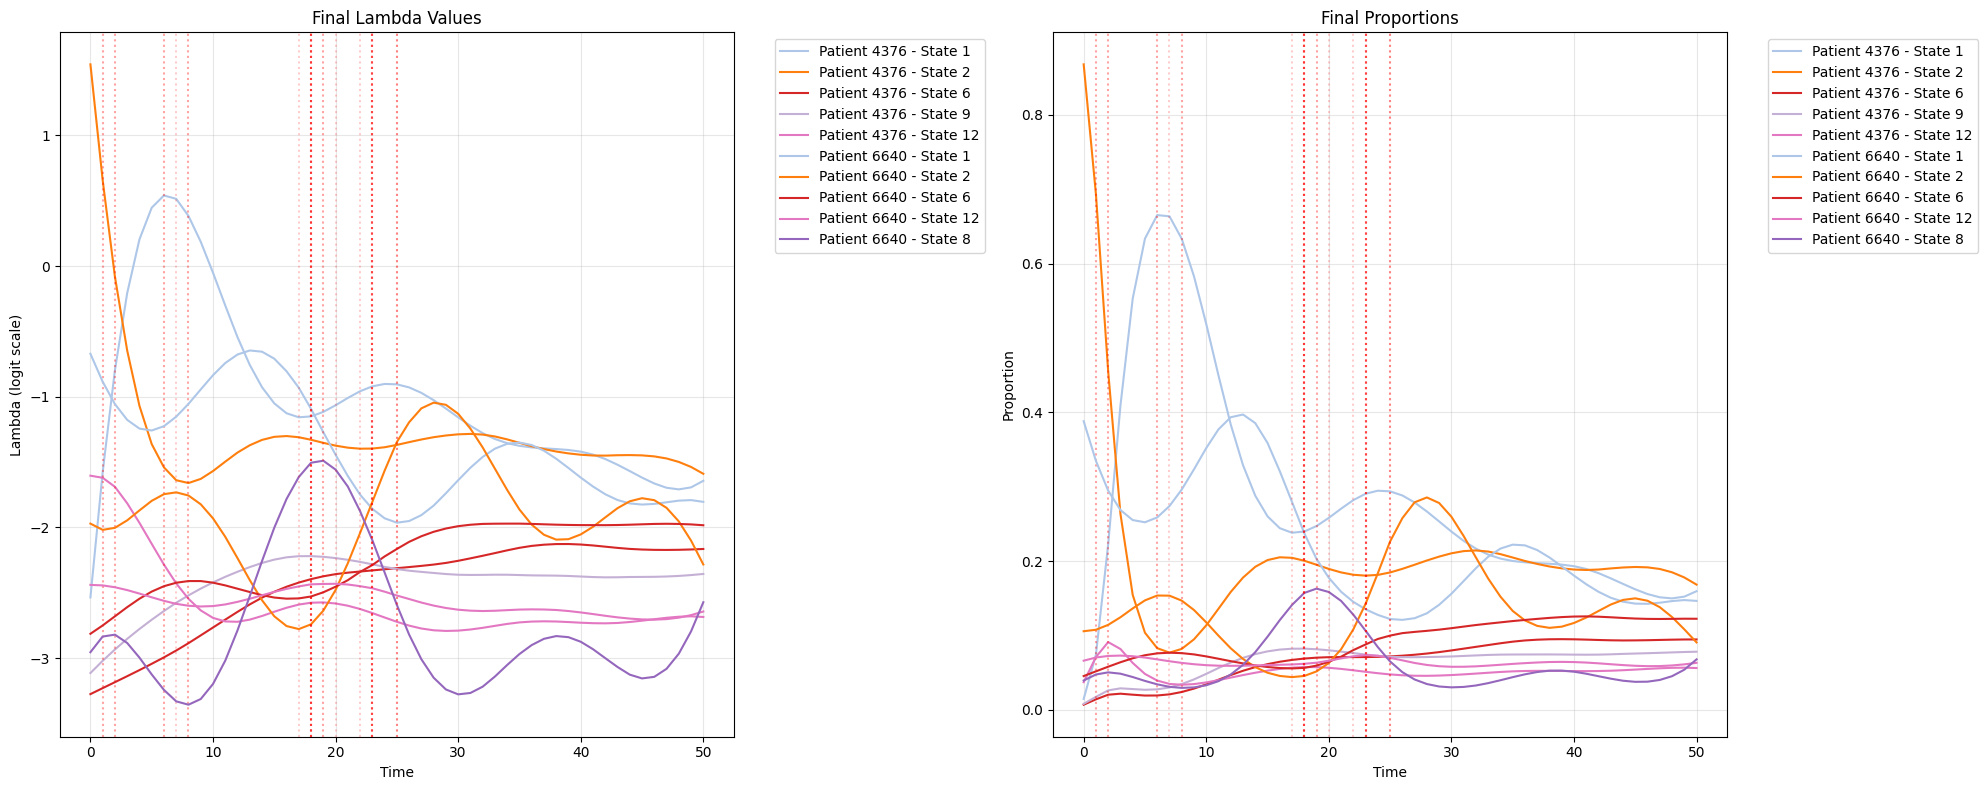


Genetic Effect Statistics for Sample Patients:

Patient 4376:
Mean shift: 0.024
Std of shifts: 0.298
Range of shifts: [-1.046, 0.558]

Top states and average proportions:
State 1: 0.281
State 2: 0.209
State 6: 0.067
State 9: 0.065
State 12: 0.052

Patient 6640:
Mean shift: 0.025
Std of shifts: 0.157
Range of shifts: [-0.248, 0.513]

Top states and average proportions:
State 1: 0.222
State 2: 0.136
State 6: 0.093
State 12: 0.064
State 8: 0.061


In [115]:
# Sample patients and set parameters
n_samples = 2
sample_patients = [4376, 6640]  # Use specific patients
n_top_states = 5  # Show only top 5 states per patient

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
time_points = np.arange(model.T)

# Get dominant states for these patients
lambda_patients = model.lambda_[sample_patients]  # [2, K, T]
patient_props = torch.softmax(lambda_patients, dim=1)  # [2, K, T]
mean_props = patient_props.mean(dim=-1)  # Average over time, now [2, K]
top_states = mean_props.topk(n_top_states, dim=-1).indices  # Get top states for each patient

# Color map for consistent colors across patients
colors = plt.cm.tab20(np.linspace(0, 1, model.K))

# Plot for each patient
for i, patient in enumerate(sample_patients):
    # Get diagnosis times for this patient
    diagnoses = model.Y[patient]  # Shape: [D, T]
    diagnosis_times = []
    for d in range(model.D):
        diag_time = torch.where(diagnoses[d])[0]
        if len(diag_time) > 0:
            diagnosis_times.append(diag_time[0].item())
            
    for j, k in enumerate(top_states[i]):
        k = k.item()  # Convert tensor to int
        color = colors[k]
        
        # Plot lambda values
        ax1.plot(time_points, model.lambda_[patient, k].detach(), '-', color=color,
                label=f'Patient {patient} - State {k}')
        
        # Plot proportions
        patient_props = torch.softmax(model.lambda_[patient].detach(), dim=0)[k]
        ax2.plot(time_points, patient_props, '-', color=color,
                label=f'Patient {patient} - State {k}')
    
    # Add vertical lines for diagnoses
    for t in diagnosis_times:
        ax1.axvline(x=t, color='red', alpha=0.2, linestyle=':')
        ax2.axvline(x=t, color='red', alpha=0.2, linestyle=':')

# Customize plots
ax1.set_title('Final Lambda Values')
ax1.set_xlabel('Time')
ax1.set_ylabel('Lambda (logit scale)')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_title('Final Proportions')
ax2.set_xlabel('Time')
ax2.set_ylabel('Proportion')
ax2.grid(True, alpha=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print genetic effects and top states
print("\nGenetic Effect Statistics for Sample Patients:")
for i, patient in enumerate(sample_patients):
    genetic_effects = model.genetic_scale * (model.G[patient] @ model.gamma).detach()
    print(f"\nPatient {patient}:")
    print(f"Mean shift: {genetic_effects.mean():.3f}")
    print(f"Std of shifts: {genetic_effects.std():.3f}")
    print(f"Range of shifts: [{genetic_effects.min():.3f}, {genetic_effects.max():.3f}]")
    
    # Print top states and their proportions
    patient_mean_props = mean_props[i]
    top_props, top_indices = patient_mean_props.topk(n_top_states)
    print("\nTop states and average proportions:")
    for state, prop in zip(top_indices, top_props):
        print(f"State {state.item()}: {prop:.3f}")

In [123]:
model_save_path='/Users/sarahurbut/Dropbox (Personal)/model_with_kappa_bigam_MGB.pt'
torch.save({
    'model_state_dict': model.state_dict(),
    'clusters': model.clusters,
 
    'psi': model.psi,
    'Y': Y,
    'prevalence_t': prevalence_t,
    'logit_prevalence_t': model.logit_prev_t,
    'G': G,
    'E': E,
    
    'disease_names':disease_names,
    'hyperparameters': {
        'N': Y.shape[0],
        'D': Y.shape[1],
        'T': Y.shape[2],
        'P': G.shape[1],
        'K': model.phi.shape[0]
    }
}, model_save_path)

In [183]:
model_save_path='/Users/sarahurbut/Dropbox (Personal)/model_with_kappa_bigam_MGB.pt'
modeldeets=torch.load(model_save_path)
state_dict=torch.load('/Users/sarahurbut/Dropbox (Personal)/model_with_kappa_bigam_MGB.pt')['model_state_dict']

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_72846/3148166278.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modeldeets=torch.load(model_save_path)
/var/f

In [ ]:
modeldeets['']

In [238]:
# Create model with same dimensions as saved state
N = state_dict['lambda_'].shape[0]
D = modeldeets['logit_prevalence_t'].shape[0]
T = modeldeets['logit_prevalence_t'].shape[1]
K = state_dict['psi'].shape[0]

model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=N, D=D, T=T, K=20, 
    P=state_dict['gamma'].shape[0],  # number of genetic components
    G=G,  # genetic data
    Y=Y,  # disease data
    R=1e-2,  # LRT penalty
    W=1e-4,  # GP weight
    prevalence_t=prevalence_t,
    signature_references=signature_refs,
    healthy_reference=True,
    init_sd_scaler=0.1,
    genetic_scale=1.0
)


/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.signature_refs = torch.tensor(signature_references, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G_scaled, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts


Cluster Sizes:
Cluster 0: 6 diseases
Cluster 1: 28 diseases
Cluster 2: 24 diseases
Cluster 3: 11 diseases
Cluster 4: 24 diseases
Cluster 5: 20 diseases
Cluster 6: 15 diseases
Cluster 7: 16 diseases
Cluster 8: 19 diseases
Cluster 9: 13 diseases
Cluster 10: 7 diseases
Cluster 11: 7 diseases
Cluster 12: 68 diseases
Cluster 13: 7 diseases
Cluster 14: 13 diseases
Cluster 15: 12 diseases
Cluster 16: 16 diseases
Cluster 17: 8 diseases
Cluster 18: 12 diseases
Cluster 19: 20 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 6
Base value (first 5): tensor([-18.4207, -18.4207, -18.4207, -18.4207, -18.4207])
Base value centered (first 5): tensor([-1.1301, -1.1301, -1.1301, -1.1301, -1.1301])
Base value centered mean: 1.4344814189826138e-06
Gamma init for k=0 (first 5): tensor([ 0.0063,  0.0153, -0.0103,  0.0724,  0.0013])

Calculating gamma for k=1:
Number of diseases in cluster: 28
Base value (first 5): tensor([-18.4207, -16.8662, -18.4207, -17.9025, -18.4207])
Base value cente

In [240]:
# Load state
model.load_state_dict(state_dict)
model.eval()

AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest()

In [208]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Load the RDS file
readRDS = robjects.r['readRDS']
pce_data = readRDS('/Users/sarahurbut/Dropbox (Personal)/pce_df_prevent.rds')
pce_df = pandas2ri.rpy2py(pce_data)  # Convert to pandas DataFrame


In [209]:
disease_names[114]

'Coronary atherosclerosis'

In [210]:
disease_names

['Bacterial enteritis',
 'Viral Enteritis',
 'Gram negative septicemia',
 'Bacterial infection NOS',
 'Staphylococcus infections',
 'Streptococcus infection',
 'E. coli',
 'Viral warts & HPV',
 'Viral infection',
 'Candidiasis',
 'Colon cancer',
 'Malignant neoplasm of rectum, rectosigmoid junction, and anus',
 'Neoplasm of unspecified nature of digestive system',
 'Cancer of bronchus; lung',
 'Melanomas of skin',
 'Other non-epithelial cancer of skin',
 'Breast cancer [female]',
 'Malignant neoplasm of female breast',
 'Cervical intraepithelial neoplasia [CIN] [Cervical dysplasia]',
 'Malignant neoplasm of uterus',
 'Malignant neoplasm of ovary',
 'Cancer of prostate',
 'Malignant neoplasm of kidney, except pelvis',
 'Malignant neoplasm of bladder',
 'Malignant neoplasm, other',
 'Secondary malignant neoplasm',
 'Secondary malignancy of lymph nodes',
 'Secondary malignancy of respiratory organs',
 'Secondary malignant neoplasm of digestive systems',
 'Secondary malignant neoplasm of l

AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest()

In [249]:
def compare_with_pce(model, pce_df, disease_names):
    """
    Compare 10-year predictions using single timepoint prediction
    """
    # Find ASCVD disease indices
    ascvd_names = [
        'Myocardial infarction',
        'Unstable angina (intermediate coronary syndrome)',
        'Coronary atherosclerosis',
       

    ]
    
    ascvd_indices = []
    for disease_name in ascvd_names:
        matches = [i for i, name in enumerate(disease_names) if name == disease_name]
        if matches:
            ascvd_indices.append(matches[0])
        else:
            print(f"Warning: Disease '{disease_name}' not found")
    
    print(f"Using ASCVD indices: {ascvd_indices}")
    
    our_10yr_risks = []
    actual_10yr = []
    valid_indices = []

    # Get predictions
    pi = model.forward()[0].detach().numpy()
    
    # Calculate 10-year risks using only enrollment time prediction
    for idx, row in enumerate(pce_df.itertuples()):
        if idx >= pi.shape[0]:  # Skip if beyond our model's patient count
            break
            
        # Calculate time index: enrollment_age - 30 (rounded to nearest integer)
        enroll_time = int(round(row.enrollment_age - 30))
        
        # Print first few to debug
        if idx < 5:
            print(f"Patient {idx}: age {row.enrollment_age}, enroll_time {enroll_time}")
        
        # Skip if age is out of bounds (but should be rare now)
        if enroll_time < 0:
            print(f"Skipping patient {idx}: age below 30")
            continue
            
        if enroll_time >= model.T:
            print(f"Skipping patient {idx}: age above max")
            continue
            
        # Check if we have enough follow-up time
        if enroll_time + 10 >= model.T:
            print(f"Skipping patient {idx}: insufficient follow-up time")
            continue
            
        # Rest of the processing...
        pi_ascvd = pi[idx, ascvd_indices, enroll_time]
        yearly_risk = 1 - np.prod(1 - pi_ascvd)
        risk = 1 - (1 - yearly_risk)**10
        our_10yr_risks.append(risk)
        
        Y_ascvd = model.Y[idx, ascvd_indices, enroll_time:enroll_time+10]
        actual = torch.any(torch.any(Y_ascvd, dim=0))
        actual_10yr.append(actual.item())
        
        valid_indices.append(idx)

    our_10yr_risks = np.array(our_10yr_risks)
    actual_10yr = np.array(actual_10yr)
    
    # Only use PCE risks for patients we could calculate risks for
    pce_risks = pce_df.iloc[valid_indices]['pce_10yr_risk_imputed'].values
    
    print(f"\nNumber of patients included in comparison: {len(valid_indices)}")
    
    # Remove any NA values
    valid_mask = ~np.isnan(pce_risks)
    our_10yr_risks = our_10yr_risks[valid_mask]
    actual_10yr = actual_10yr[valid_mask]
    pce_risks = pce_risks[valid_mask]
    
    print(f"Number of patients after removing NAs: {len(pce_risks)}")
    
    # Calculate ROC AUCs
    our_auc = roc_auc_score(actual_10yr, our_10yr_risks)
    pce_auc = roc_auc_score(actual_10yr, pce_risks)
    
    print(f"\nROC AUC Comparison (10-year prediction from enrollment):")
    print(f"Our model: {our_auc:.3f}")
    print(f"PCE: {pce_auc:.3f}")
    
    plt.figure(figsize=(8,6))
    plot_roc_curve(actual_10yr, our_10yr_risks, label=f'Our Model (AUC={our_auc:.3f})')
    plot_roc_curve(actual_10yr, pce_risks, label=f'PCE (AUC={pce_auc:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for 10-year ASCVD Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Rest of the function remains the same...

In [234]:
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=label)

Using ASCVD indices: [112, 111, 114]
Patient 0: age 45.6050228310502, enroll_time 16
Patient 1: age 56.5337899543379, enroll_time 27
Patient 2: age 36.059703196347, enroll_time 6
Patient 3: age 57.3364155251142, enroll_time 27
Patient 4: age 54.6981735159817, enroll_time 25
Skipping patient 15: insufficient follow-up time
Skipping patient 26: age below 30
Skipping patient 29: insufficient follow-up time
Skipping patient 33: insufficient follow-up time
Skipping patient 44: insufficient follow-up time
Skipping patient 46: age below 30
Skipping patient 49: age below 30
Skipping patient 51: insufficient follow-up time
Skipping patient 52: insufficient follow-up time
Skipping patient 55: age below 30
Skipping patient 59: insufficient follow-up time
Skipping patient 62: insufficient follow-up time
Skipping patient 65: insufficient follow-up time
Skipping patient 73: insufficient follow-up time
Skipping patient 93: insufficient follow-up time
Skipping patient 94: insufficient follow-up time
S

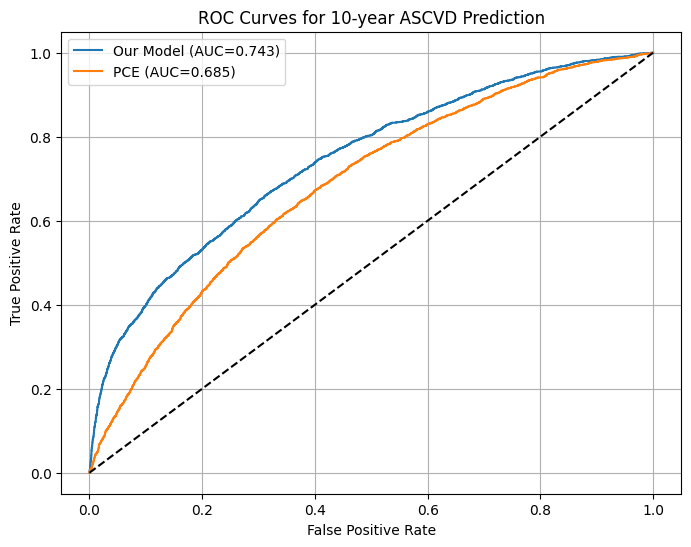

In [250]:
pce_df = pd.read_csv('/Users/sarahurbut/Dropbox (Personal)/mgbb_pce_consent_date_ordered.csv')
# Load PCE data


# Run comparison
compare_with_pce(model, pce_df, disease_names)

In [253]:
def compare_with_pce(model, pce_df, disease_names):
    """
    Compare 10-year predictions using single timepoint prediction
    """
    ascvd_names = [
        'Myocardial infarction',
        'Unstable angina (intermediate coronary syndrome)',
        'Coronary atherosclerosis',
    ]
    
    ascvd_indices = []
    for disease_name in ascvd_names:
        matches = [i for i, name in enumerate(disease_names) if name == disease_name]
        if matches:
            ascvd_indices.append(matches[0])
    
    print(f"Using ASCVD indices: {ascvd_indices}")
    
    # For our model - use all eligible patients
    our_10yr_risks = []
    actual_10yr_all = []
    valid_indices = []
    
    # For PCE - subset with valid scores
    pce_risks = []
    actual_10yr_pce = []
    pce_indices = []  # Track which indices have PCE scores

    pi = model.forward()[0].detach().numpy()
    
    for idx, row in enumerate(pce_df.itertuples()):
        if idx >= pi.shape[0]:  # Skip if beyond model's patient count
            break
            
        enroll_time = int(round(row.enrollment_age - 30))
        
        # Basic eligibility checks
        if enroll_time < 0 or enroll_time >= model.T:
            continue
            
        if enroll_time + 10 >= model.T:
            continue
            
        # Calculate our risk and actual outcome
        pi_ascvd = pi[idx, ascvd_indices, enroll_time]
        yearly_risk = 1 - np.prod(1 - pi_ascvd)
        risk = 1 - (1 - yearly_risk)**10
        
        Y_ascvd = model.Y[idx, ascvd_indices, enroll_time:enroll_time+10]
        actual = torch.any(torch.any(Y_ascvd, dim=0))
        
        # Always include for our model
        our_10yr_risks.append(risk)
        actual_10yr_all.append(actual.item())
        valid_indices.append(idx)
        
        # Only include in PCE comparison if score exists
        if not np.isnan(row.pce_10yr_risk_imputed):
            pce_risks.append(row.pce_10yr_risk_imputed)
            actual_10yr_pce.append(actual.item())
            pce_indices.append(len(our_10yr_risks) - 1)  # Index in our_10yr_risks array

    our_10yr_risks = np.array(our_10yr_risks)
    actual_10yr_all = np.array(actual_10yr_all)
    pce_risks = np.array(pce_risks)
    actual_10yr_pce = np.array(actual_10yr_pce)
    
    print(f"\nNumber of patients for our model: {len(our_10yr_risks)}")
    print(f"Number of patients for PCE comparison: {len(pce_risks)}")
    
    # Calculate ROC AUCs
    our_auc_all = roc_auc_score(actual_10yr_all, our_10yr_risks)
    our_auc_pce_subset = roc_auc_score(actual_10yr_pce, our_10yr_risks[pce_indices])
    pce_auc = roc_auc_score(actual_10yr_pce, pce_risks)
    
    print(f"\nROC AUC Comparison:")
    print(f"Our model (all eligible): {our_auc_all:.3f}")
    print(f"Our model (PCE subset): {our_auc_pce_subset:.3f}")
    print(f"PCE: {pce_auc:.3f}")
    
    plt.figure(figsize=(8,6))
    plot_roc_curve(actual_10yr_all, our_10yr_risks, label=f'Our Model - All (AUC={our_auc_all:.3f})')
    plot_roc_curve(actual_10yr_pce, our_10yr_risks[pce_indices], label=f'Our Model - PCE subset (AUC={our_auc_pce_subset:.3f})')
    plot_roc_curve(actual_10yr_pce, pce_risks, label=f'PCE (AUC={pce_auc:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for 10-year ASCVD Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return our_auc_all, our_auc_pce_subset, pce_auc, valid_indices

Using ASCVD indices: [112, 111, 114]

Number of patients for our model: 27498
Number of patients for PCE comparison: 18495

ROC AUC Comparison:
Our model (all eligible): 0.802
Our model (PCE subset): 0.743
PCE: 0.685


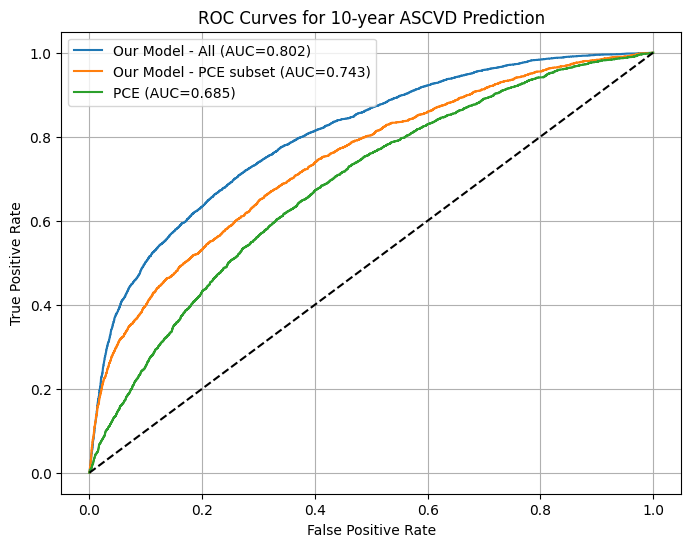

(np.float64(0.8019251215054751),
 np.float64(0.7425262446599484),
 np.float64(0.6845379356173965),
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  27,
  28,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  45,
  47,
  48,
  50,
  53,
  54,
  56,
  57,
  58,
  60,
  61,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  95,
  96,
  97,
  99,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  119,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  157,
  158,
  159,
  160,
  161,
  162,
  164,
  165,
  166,


In [254]:
compare_with_pce(model, pce_df, disease_names)

In [251]:
prevent_df = pd.read_csv('/Users/sarahurbut/Dropbox (Personal)/mgbb_prev_consent_date_ordered.csv')


In [245]:
def compute_aucs(model, prevent_df, disease_names):
    """Compare 10-year predictions using single timepoint prediction"""
    # Find ASCVD disease indices
    ascvd_names = [
        'Myocardial infarction',
        'Unstable angina (intermediate coronary syndrome)',
        'Coronary atherosclerosis',
    ]
    
    ascvd_indices = []
    for disease_name in ascvd_names:
        matches = [i for i, name in enumerate(disease_names) if name == disease_name]
        if matches:
            ascvd_indices.append(matches[0])
        else:
            print(f"Warning: Disease '{disease_name}' not found")
    
    print(f"Using ASCVD indices: {ascvd_indices}")
    
    our_10yr_risks = []
    actual_10yr = []
    prevent_risks = []
    valid_indices = []

    # Get predictions
    pi = model.forward()[0].detach().numpy()
    
    # Calculate 10-year risks using only enrollment time prediction
    for idx, row in prevent_df.iterrows():
        if np.isnan(row.prevent_base_ascvd_risk):  # Skip if prevent score is NA
            continue
            
        # Calculate time index: enrollment_age - 30 (rounded to nearest integer)
        enroll_time = int(round(row.enrollment_age - 30))
        
        # Skip if age is out of bounds
        if enroll_time < 0 or enroll_time >= model.T:
            continue
            
        # Check if we have enough follow-up time
        if enroll_time + 10 >= model.T:
            continue
            
        # Calculate risks
        pi_ascvd = pi[idx, ascvd_indices, enroll_time]
        yearly_risk = 1 - np.prod(1 - pi_ascvd)
        risk = 1 - (1 - yearly_risk)**10
        our_10yr_risks.append(risk)
        
        Y_ascvd = model.Y[idx, ascvd_indices, enroll_time:enroll_time+10]
        actual = torch.any(torch.any(Y_ascvd, dim=0))
        actual_10yr.append(actual.item())
        
        prevent_risks.append(row.prevent_base_ascvd_risk)
        valid_indices.append(idx)

    our_10yr_risks = np.array(our_10yr_risks)
    actual_10yr = np.array(actual_10yr)
    prevent_risks = np.array(prevent_risks)
    
    # Calculate AUCs
    auc_ours = roc_auc_score(actual_10yr, our_10yr_risks)
    auc_prevent = roc_auc_score(actual_10yr, prevent_risks)


  
    
    plt.figure(figsize=(8,6))
    plot_roc_curve(actual_10yr, our_10yr_risks, label=f'Our Model (AUC={auc_ours:.3f})')
    plot_roc_curve(actual_10yr, prevent_risks, label=f'Prevent (AUC={ auc_prevent:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for 10-year ASCVD Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return auc_ours, auc_prevent, valid_indices

Using ASCVD indices: [112, 111, 114]


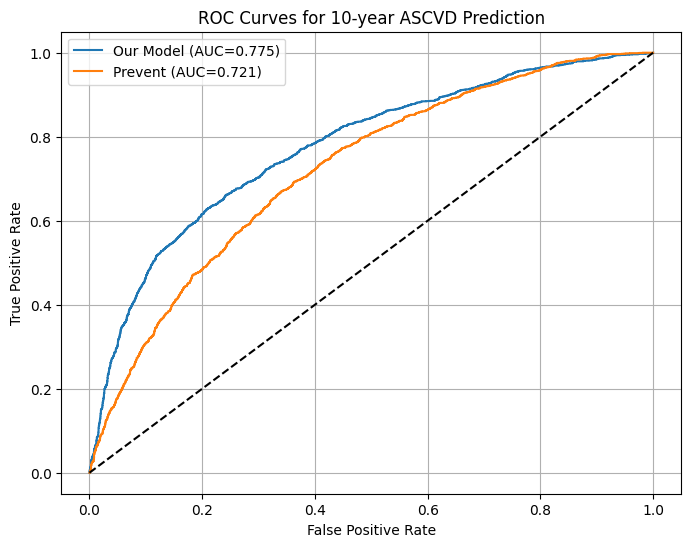

(np.float64(0.7747988329458316),
 np.float64(0.7214268893442346),
 [5,
  7,
  9,
  14,
  18,
  36,
  38,
  43,
  45,
  47,
  48,
  50,
  53,
  57,
  58,
  61,
  64,
  67,
  70,
  72,
  74,
  75,
  78,
  81,
  83,
  86,
  89,
  90,
  96,
  103,
  104,
  106,
  113,
  114,
  115,
  117,
  124,
  125,
  126,
  127,
  129,
  130,
  134,
  138,
  139,
  146,
  151,
  165,
  168,
  171,
  173,
  174,
  175,
  178,
  182,
  187,
  190,
  192,
  200,
  201,
  204,
  205,
  212,
  213,
  216,
  221,
  222,
  223,
  228,
  229,
  236,
  237,
  239,
  243,
  246,
  253,
  263,
  265,
  269,
  279,
  283,
  289,
  290,
  291,
  292,
  294,
  295,
  298,
  301,
  302,
  304,
  307,
  308,
  312,
  316,
  319,
  320,
  323,
  324,
  325,
  327,
  330,
  334,
  338,
  339,
  342,
  343,
  347,
  351,
  355,
  356,
  358,
  359,
  360,
  363,
  366,
  367,
  369,
  371,
  372,
  376,
  379,
  380,
  384,
  390,
  392,
  393,
  394,
  395,
  396,
  398,
  399,
  401,
  405,
  409,
  411,
  412,
  414,


In [246]:
compute_aucs(model, prevent_df, disease_names=disease_names)

In [260]:
def compute_aucs(model, prevent_df, disease_names):
    """Compare 10-year predictions using single timepoint prediction"""
    # Find ASCVD disease indices
    ascvd_names = [
        'Myocardial infarction',
        'Unstable angina (intermediate coronary syndrome)',
        'Coronary atherosclerosis',
    ]
    
    ascvd_indices = []
    for disease_name in ascvd_names:
        matches = [i for i, name in enumerate(disease_names) if name == disease_name]
        if matches:
            ascvd_indices.append(matches[0])
    
    # For our model - use all patients
    our_10yr_risks = []
    actual_10yr_all = []
    
    # For Prevent - only valid scores
    prevent_risks = []
    actual_10yr_prevent = []
    
    # Get predictions
    pi = model.forward()[0].detach().numpy()
    
    # Calculate risks for all patients
    for idx, row in prevent_df.iterrows():
        enroll_time = int(round(row.enrollment_age - 30))
        
        if enroll_time < 0 or enroll_time >= model.T:
            continue
            
        if enroll_time + 10 >= model.T:
            continue
            
        # Always calculate our risk
        pi_ascvd = pi[idx, ascvd_indices, enroll_time]
        yearly_risk = 1 - np.prod(1 - pi_ascvd)
        risk = 1 - (1 - yearly_risk)**10
        our_10yr_risks.append(risk)
        
        Y_ascvd = model.Y[idx, ascvd_indices, enroll_time:enroll_time+10]
        actual = torch.any(torch.any(Y_ascvd, dim=0))
        actual_10yr_all.append(actual.item())
        
        # Only include in Prevent comparison if score exists
        if not np.isnan(row.prevent_base_ascvd_risk):
            prevent_risks.append(row.prevent_base_ascvd_risk)
            actual_10yr_prevent.append(actual.item())
    
    # Calculate AUCs
    auc_ours = roc_auc_score(actual_10yr_all, our_10yr_risks)
    auc_prevent = roc_auc_score(actual_10yr_prevent, prevent_risks)
    
    print(f"Our model evaluated on {len(our_10yr_risks)} patients")
    print(f"Prevent evaluated on {len(prevent_risks)} patients")
    
    return auc_ours, auc_prevent

In [269]:
def compare_with_risk_scores(model, pce_df, prevent_df, disease_names):
    """
    Compare 10-year predictions with both PCE and Prevent scores
    """
    ascvd_names = [
        'Myocardial infarction',
        'Unstable angina (intermediate coronary syndrome)',
        'Coronary atherosclerosis',
    ]
    
    ascvd_indices = []
    for disease_name in ascvd_names:
        matches = [i for i, name in enumerate(disease_names) if name == disease_name]
        if matches:
            ascvd_indices.append(matches[0])
    
    print(f"Using ASCVD indices: {ascvd_indices}")
    
    # For our model - use all eligible patients
    our_10yr_risks = []
    actual_10yr_all = []
    valid_indices = []
    
    # For PCE and Prevent - subsets with valid scores
    pce_risks = []
    prevent_risks = []
    actual_10yr_pce = []
    actual_10yr_prevent = []
    pce_indices = []
    prevent_indices = []

    pi = model.forward()[0].detach().numpy()
    
    for idx, (pce_row, prevent_row) in enumerate(zip(pce_df.itertuples(), prevent_df.itertuples())):
        if idx >= pi.shape[0]:  # Skip if beyond model's patient count
            break
            
        enroll_time = int(round(pce_row.enrollment_age - 30))
        
        # Basic eligibility checks
        if enroll_time < 0 or enroll_time >= model.T:
            continue
            
        if enroll_time + 10 >= model.T:
            continue
            
        # Calculate our risk and actual outcome
        pi_ascvd = pi[idx, ascvd_indices, enroll_time]
        yearly_risk = 1 - np.prod(1 - pi_ascvd)
        risk = 1 - (1 - yearly_risk)**10
        
        Y_ascvd = model.Y[idx, ascvd_indices, enroll_time:enroll_time+10]
        actual = torch.any(torch.any(Y_ascvd, dim=0))
        
        # Always include for our model
        our_10yr_risks.append(risk)
        actual_10yr_all.append(actual.item())
        valid_indices.append(idx)
        
        # Include in PCE comparison if score exists
        if not np.isnan(pce_row.pce_10yr_risk_imputed):
            pce_risks.append(pce_row.pce_10yr_risk_imputed)
            actual_10yr_pce.append(actual.item())
            pce_indices.append(len(our_10yr_risks) - 1)
            
        # Include in Prevent comparison if score exists
        if not np.isnan(prevent_row.prevent_base_ascvd_risk):
            prevent_risks.append(prevent_row.prevent_base_ascvd_risk)
            actual_10yr_prevent.append(actual.item())
            prevent_indices.append(len(our_10yr_risks) - 1)

    # Convert to numpy arrays
    our_10yr_risks = np.array(our_10yr_risks)
    actual_10yr_all = np.array(actual_10yr_all)
    pce_risks = np.array(pce_risks)
    prevent_risks = np.array(prevent_risks)
    actual_10yr_pce = np.array(actual_10yr_pce)
    actual_10yr_prevent = np.array(actual_10yr_prevent)
    
    print(f"\nNumber of patients for our model: {len(our_10yr_risks)}")
    print(f"Number of patients for PCE comparison: {len(pce_risks)}")
    print(f"Number of patients for Prevent comparison: {len(prevent_risks)}")
    
    # Calculate ROC AUCs
    our_auc_all = roc_auc_score(actual_10yr_all, our_10yr_risks)
    our_auc_pce_subset = roc_auc_score(actual_10yr_pce, our_10yr_risks[pce_indices])
    our_auc_prevent_subset = roc_auc_score(actual_10yr_prevent, our_10yr_risks[prevent_indices])
    pce_auc = roc_auc_score(actual_10yr_pce, pce_risks)
    prevent_auc = roc_auc_score(actual_10yr_prevent, prevent_risks)
    
    print(f"\nROC AUC Comparison:")
    print(f"Aladynoulli (all eligible): {our_auc_all:.3f}")
    #print(f"Our model (PCE subset): {our_auc_pce_subset:.3f}")
    print(f"Aladynoulli (Prevent subset): {our_auc_prevent_subset:.3f}")
    print(f"PCE: {pce_auc:.3f}")
    print(f"Prevent: {prevent_auc:.3f}")
    
    # Plot ROC curves
    plt.figure(figsize=(10,8))
    plot_roc_curve(actual_10yr_all, our_10yr_risks, label=f'Our Model - All (AUC={our_auc_all:.3f})')
    #plot_roc_curve(actual_10yr_pce, our_10yr_risks[pce_indices], label=f'Our Model - PCE subset (AUC={our_auc_pce_subset:.3f})')
    plot_roc_curve(actual_10yr_pce, pce_risks, label=f'PCE (AUC={pce_auc:.3f})')
    plot_roc_curve(actual_10yr_prevent, our_10yr_risks[prevent_indices], label=f'Our Model - Prevent subset (AUC={our_auc_prevent_subset:.3f})')
    plot_roc_curve(actual_10yr_prevent, prevent_risks, label=f'Prevent (AUC={prevent_auc:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for 10-year ASCVD Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        'our_auc_all': our_auc_all,
        #'our_auc_pce_subset': our_auc_pce_subset,
        'pce_auc': pce_auc,
        'our_auc_prevent_subset': our_auc_prevent_subset,
        'prevent_auc': prevent_auc,
        'valid_indices': valid_indices
    }

Using ASCVD indices: [112, 111, 114]

Number of patients for our model: 27498
Number of patients for PCE comparison: 18495
Number of patients for Prevent comparison: 6141

ROC AUC Comparison:
Aladynoulli (all eligible): 0.802
Aladynoulli (Prevent subset): 0.775
PCE: 0.685
Prevent: 0.721


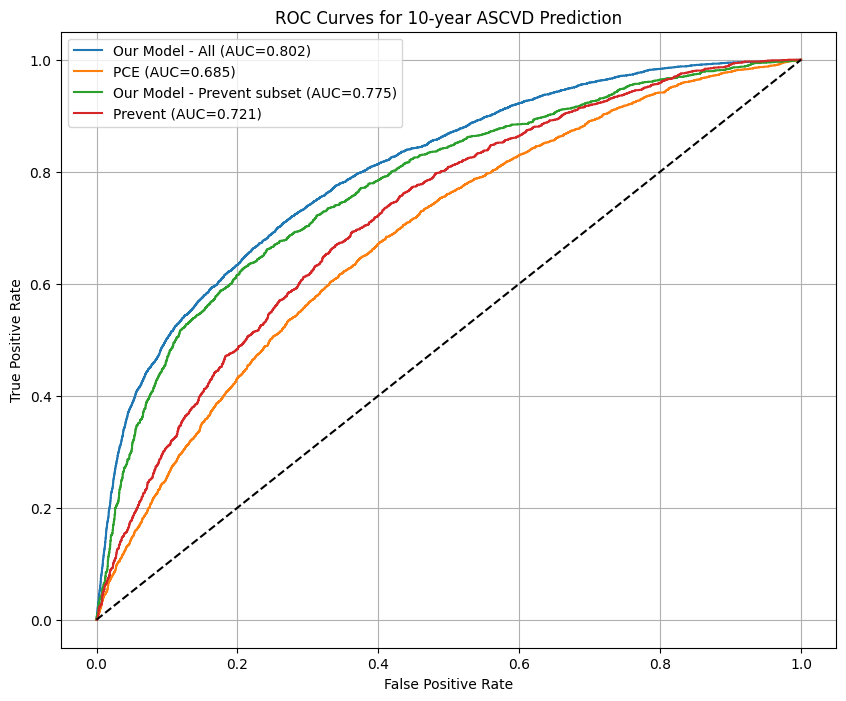

{'our_auc_all': np.float64(0.8019251215054751),
 'pce_auc': np.float64(0.6845379356173965),
 'our_auc_prevent_subset': np.float64(0.7747988329458316),
 'prevent_auc': np.float64(0.7214268893442346),
 'valid_indices': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  27,
  28,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  45,
  47,
  48,
  50,
  53,
  54,
  56,
  57,
  58,
  60,
  61,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  95,
  96,
  97,
  99,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  119,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  146,
  147,
  

In [270]:
compare_with_risk_scores(model, pce_df, prevent_df, disease_names)

In [ ]:
 compare_with_risk_scores(model, pce_df, prevent_df, disease_names)